In [3]:
import pandas as pd
from scipy.stats import zscore

from sklearn.preprocessing import MinMaxScaler
from yellowbrick.classifier import ClassPredictionError
from sklearn.metrics import accuracy_score

In [3]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"

In [4]:
df_features=pd.read_csv('features.csv')

In [5]:
df_features

,Unnamed: 0.1,Unnamed: 0,Time,IG,Participant,HR_Mean,HR_Max,HR_Std,HR_Skew,HR_Q1G,...,HR_Std_Historical,ACC_Mean_Historical,ACC_Std_Historical,Activity_Bouts,Date,Mean,Std,glucose_level,Activity24,Activity1h
0,0,0,2020-06-05 16:43:09,112.0,14,NaN,NaN,NaN,NaN,NaN,...,5.010597,64.442514,4.188944,0,2020-06-05,105.977273,6.227446,Normal,0.0,0.0
1,1,1,2020-06-05 16:48:09,112.0,14,NaN,NaN,NaN,NaN,NaN,...,5.010597,64.442514,4.188944,0,2020-06-05,105.977273,6.227446,Normal,0.0,0.0
2,2,2,2020-06-05 16:53:09,110.0,14,NaN,NaN,NaN,NaN,NaN,...,5.010597,64.442514,4.188944,0,2020-06-05,105.977273,6.227446,Normal,0.0,0.0
3,3,3,2020-06-05 16:58:10,107.0,14,NaN,NaN,NaN,NaN,NaN,...,5.010597,64.442514,4.188944,0,2020-06-05,105.977273,6.227446,Normal,0.0,0.0
4,4,4,2020-06-05 17:03:09,104.0,14,NaN,NaN,NaN,NaN,NaN,...,5.010597,64.442514,4.188944,0,2020-06-05,105.977273,6.227446,Normal,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36850,36850,36850,2020-02-22 17:28:23,137.0,1,0.0,0.0,0.0,0.0,0.0,...,0.000000,64.008889,3.897767,0,2020-02-22,103.869159,13.293427,High,0.0,0.0
36851,36851,36851,2020-02-22 17:33:23,139.0,1,0.0,0.0,0.0,0.0,0.0,...,0.000000,64.008889,3.897767,0,2020-02-22,103.869159,13.293427,High,0.0,0.0
36852,36852,36852,2020-02-22 17:38:23,141.0,1,0.0,0.0,0.0,0.0,0.0,...,0.000000,64.008889,3.897767,0,2020-02-22,103.869159,13.293427,High,0.0,0.0
36853,36853,36853,2020-02-22 17:43:23,143.0,1,0.0,0.0,0.0,0.0,0.0,...,0.000000,64.008889,3.897767,0,2020-02-22,103.869159,13.293427,High,0.0,0.0


In [6]:
print("Total Data:",len(df_features))

Total Data: 36855


In [7]:
print("Missing Data:",df_features.isnull().any(axis=1).sum())

Missing Data: 12239


In [8]:
print("Actual Instances of Data:",len(df_features)-df_features.isnull().any(axis=1).sum())

Actual Instances of Data: 24616


In [9]:
df_features.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Time', 'IG', 'Participant', 'HR_Mean',
       'HR_Max', 'HR_Std', 'HR_Skew', 'HR_Q1G', 'HR_Q3G', 'EDA_Mean',
       'EDA_Max', 'EDA_Std', 'EDA_Skew', 'EDA_Q1G', 'EDA_Q3G', 'TEMP_Mean',
       'TEMP_Max', 'TEMP_Std', 'TEMP_Skew', 'TEMP_Q1G', 'TEMP_Q3G', 'ACC_Mean',
       'ACC_Max', 'ACC_Std', 'ACC_Skew', 'ACC_Q1G', 'ACC_Q3G', 'BVP_Mean',
       'BVP_Max', 'BVP_Std', 'BVP_Skew', 'BVP_Q1G', 'BVP_Q3G', 'Gender',
       'HbA1c', 'PeakEDA', 'PeakEDA_2hrsum', 'PeakEDA_2hrmean', 'maxHRV',
       'minHRV', 'medianHRV', 'meanHRV', 'SDNN', 'NN50', 'pNN50', 'RMSSD',
       'calories2hr', 'protien2hr', 'sugar2hr', 'carbs2hr', 'calories8r',
       'protien8hr', 'sugar8hr', 'carbs8hr', 'calories24hr', 'protien24hr',
       'sugar24hr', 'carbs24hr', 'Eat', 'Eatcnt2hr', 'Eatcnt8hr', 'Eatcnt24hr',
       'Eatmean2hr', 'Eatmean8hr', 'Eatmean24hr', 'WakeTime', 'Minfrommid',
       'Hourfrommid', 'EDA_Min', 'calories8hr', 'TEMP_Min', 'BVP_Min',
       'ACC_Min', 'HR_M

In [25]:
df_features.drop(['Unnamed: 0.1', 'Unnamed: 0'],axis=1, inplace=True)


In [26]:
#df_features=df_features['Participant']
df_features=df_features.dropna()


In [27]:
numeric_features=['HR_Mean',
                  'HR_Max',
                  'HR_Std',
                  'HR_Skew',
                  'HR_Q1G', 
                  'HR_Q3G', 
                  'EDA_Mean',
       'EDA_Max', 'EDA_Std', 'EDA_Skew', 'EDA_Q1G', 'EDA_Q3G', 'TEMP_Mean',
       'TEMP_Max', 'TEMP_Std', 'TEMP_Skew', 'TEMP_Q1G', 'TEMP_Q3G', 'ACC_Mean',
       'ACC_Max', 'ACC_Std', 'ACC_Skew', 'ACC_Q1G', 'ACC_Q3G', 'BVP_Mean',
       'BVP_Max', 'BVP_Std', 'BVP_Skew', 'BVP_Q1G', 'BVP_Q3G', 'HbA1c', 'PeakEDA', 'PeakEDA_2hrsum', 'PeakEDA_2hrmean', 'maxHRV',
       'minHRV', 'medianHRV', 'meanHRV', 'SDNN', 'NN50', 'pNN50', 'RMSSD',
       'calories2hr', 'protien2hr', 'sugar2hr', 'carbs2hr', 'calories8r',
       'protien8hr', 'sugar8hr', 'carbs8hr', 'calories24hr', 'protien24hr',
       'sugar24hr', 'carbs24hr', 'Eat', 'Eatcnt2hr', 'Eatcnt8hr', 'Eatcnt24hr',
       'Eatmean2hr', 'Eatmean8hr', 'Eatmean24hr', 'WakeTime', 'Minfrommid',
       'Hourfrommid', 'EDA_Min', 'calories8hr', 'TEMP_Min', 'BVP_Min',
       'ACC_Min', 'HR_Min', 'Wake_Time', 'HR_Mean_Historical',
       'HR_Std_Historical', 'ACC_Mean_Historical', 'ACC_Std_Historical',
       'Activity_Bouts', 'Activity24','Activity1h']

categorical_features = ['Participant','Gender']


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_features is your DataFrame

# Extract features and target variable
X = df_features.drop(['Unnamed: 0.1', 'Unnamed: 0', 'Time', 'IG', 'Participant', 'Date', 'glucose_level'], axis=1)
y = df_features['glucose_level']

# Convert categorical target variable to numerical
y = y.map({'Low': 0, 'Normal': 1, 'High': 2})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a dictionary to store individual models
participant_models = {}

# Loop through each unique participant
for participant_id in df_features['Participant'].unique():
    # Filter data for the current participant
    participant_X_train = X_train[df_features['Participant'] == participant_id]
    participant_y_train = y_train[df_features['Participant'] == participant_id]

    participant_X_test = X_test[df_features['Participant'] == participant_id]
    participant_y_test = y_test[df_features['Participant'] == participant_id]

    # Create an XGBoost classifier
    xgb_model = XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)

    # Train the model
    xgb_model.fit(participant_X_train, participant_y_train)

    # Make predictions
    participant_y_pred = xgb_model.predict(participant_X_test)

    # Evaluate the model
    accuracy = accuracy_score(participant_y_test, participant_y_pred)
    classification_rep = classification_report(participant_y_test, participant_y_pred)

    print(f"Participant {participant_id} - Accuracy: {accuracy:.2f}")
    print("Classification Report:\n", classification_rep)

    # Save the model to the dictionary
    participant_models[participant_id] = xgb_model
"""
# Visualize decision boundaries for a specific participant
# (You can modify this part based on the features you want to visualize)
sample_participant_id = df_features['Participant'].iloc[0]
sample_participant_model = participant_models[sample_participant_id]

X_visualization = X[['HR_Mean', 'EDA_Mean']].values
X_visualization_scaled = scaler.transform(X_visualization)

h = .02  # Step size in the mesh
x_min, x_max = X_visualization_scaled[:, 0].min() - 1, X_visualization_scaled[:, 0].max() + 1
y_min, y_max = X_visualization_scaled[:, 1].min() - 1, X_visualization_scaled[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = sample_participant_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.3)
plt.scatter(X_visualization_scaled[:, 0], X_visualization_scaled[:, 1], c=y, edgecolor='k', cmap='viridis')
plt.title(f'XGBoost Decision Boundaries for Participant {sample_participant_id}')
plt.xlabel('HR_Mean (scaled)')
plt.ylabel('EDA_Mean (scaled)')
plt.show()
"""

/dev/shm/jobs/41802623/ipykernel_61368/2703004015.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  participant_X_train = X_train[df_features['Participant'] == participant_id]
/dev/shm/jobs/41802623/ipykernel_61368/2703004015.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  participant_X_test = X_test[df_features['Participant'] == participant_id]


Participant 14 - Accuracy: 0.87
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.61      0.71        71
           1       0.86      0.97      0.91       316
           2       0.93      0.73      0.82        73

    accuracy                           0.87       460
   macro avg       0.88      0.77      0.81       460
weighted avg       0.87      0.87      0.87       460



/dev/shm/jobs/41802623/ipykernel_61368/2703004015.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  participant_X_train = X_train[df_features['Participant'] == participant_id]
/dev/shm/jobs/41802623/ipykernel_61368/2703004015.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  participant_X_test = X_test[df_features['Participant'] == participant_id]


Participant 6 - Accuracy: 0.93
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.61      0.73        46
           1       0.93      0.98      0.95       433
           2       0.92      0.87      0.89        92

    accuracy                           0.93       571
   macro avg       0.92      0.82      0.86       571
weighted avg       0.93      0.93      0.93       571



/dev/shm/jobs/41802623/ipykernel_61368/2703004015.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  participant_X_train = X_train[df_features['Participant'] == participant_id]
/dev/shm/jobs/41802623/ipykernel_61368/2703004015.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  participant_X_test = X_test[df_features['Participant'] == participant_id]


Participant 2 - Accuracy: 0.87
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.66      0.70        61
           1       0.87      0.95      0.91       302
           2       0.97      0.73      0.83        77

    accuracy                           0.87       440
   macro avg       0.86      0.78      0.81       440
weighted avg       0.87      0.87      0.86       440



/dev/shm/jobs/41802623/ipykernel_61368/2703004015.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  participant_X_train = X_train[df_features['Participant'] == participant_id]
/dev/shm/jobs/41802623/ipykernel_61368/2703004015.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  participant_X_test = X_test[df_features['Participant'] == participant_id]


Participant 7 - Accuracy: 0.91
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.73      0.79        49
           1       0.93      0.96      0.94       349
           2       0.83      0.76      0.79        63

    accuracy                           0.91       461
   macro avg       0.87      0.82      0.84       461
weighted avg       0.90      0.91      0.90       461



/dev/shm/jobs/41802623/ipykernel_61368/2703004015.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  participant_X_train = X_train[df_features['Participant'] == participant_id]
/dev/shm/jobs/41802623/ipykernel_61368/2703004015.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  participant_X_test = X_test[df_features['Participant'] == participant_id]


Participant 3 - Accuracy: 0.90
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.77      0.80        52
           1       0.91      0.96      0.93       293
           2       0.90      0.75      0.82        60

    accuracy                           0.90       405
   macro avg       0.88      0.82      0.85       405
weighted avg       0.90      0.90      0.90       405



/dev/shm/jobs/41802623/ipykernel_61368/2703004015.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  participant_X_train = X_train[df_features['Participant'] == participant_id]
/dev/shm/jobs/41802623/ipykernel_61368/2703004015.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  participant_X_test = X_test[df_features['Participant'] == participant_id]


Participant 8 - Accuracy: 0.84
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.52      0.61        67
           1       0.85      0.94      0.89       362
           2       0.86      0.66      0.75        86

    accuracy                           0.84       515
   macro avg       0.82      0.71      0.75       515
weighted avg       0.84      0.84      0.83       515



/dev/shm/jobs/41802623/ipykernel_61368/2703004015.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  participant_X_train = X_train[df_features['Participant'] == participant_id]
/dev/shm/jobs/41802623/ipykernel_61368/2703004015.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  participant_X_test = X_test[df_features['Participant'] == participant_id]


Participant 10 - Accuracy: 0.88
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.64      0.71        47
           1       0.88      0.96      0.92       306
           2       0.92      0.68      0.78        71

    accuracy                           0.88       424
   macro avg       0.87      0.76      0.81       424
weighted avg       0.88      0.88      0.87       424



/dev/shm/jobs/41802623/ipykernel_61368/2703004015.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  participant_X_train = X_train[df_features['Participant'] == participant_id]
/dev/shm/jobs/41802623/ipykernel_61368/2703004015.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  participant_X_test = X_test[df_features['Participant'] == participant_id]


Participant 9 - Accuracy: 0.93
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.81      0.79        42
           1       0.95      0.95      0.95       326
           2       0.90      0.88      0.89        60

    accuracy                           0.93       428
   macro avg       0.87      0.88      0.88       428
weighted avg       0.93      0.93      0.93       428



/dev/shm/jobs/41802623/ipykernel_61368/2703004015.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  participant_X_train = X_train[df_features['Participant'] == participant_id]
/dev/shm/jobs/41802623/ipykernel_61368/2703004015.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  participant_X_test = X_test[df_features['Participant'] == participant_id]


Participant 15 - Accuracy: 0.91
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.76      0.78        45
           1       0.93      0.96      0.94       253
           2       0.93      0.83      0.87        46

    accuracy                           0.91       344
   macro avg       0.89      0.85      0.87       344
weighted avg       0.91      0.91      0.91       344



/dev/shm/jobs/41802623/ipykernel_61368/2703004015.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  participant_X_train = X_train[df_features['Participant'] == participant_id]
/dev/shm/jobs/41802623/ipykernel_61368/2703004015.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  participant_X_test = X_test[df_features['Participant'] == participant_id]


Participant 11 - Accuracy: 0.92
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.72      0.81        82
           1       0.91      0.98      0.94       400
           2       0.94      0.83      0.88        95

    accuracy                           0.92       577
   macro avg       0.93      0.84      0.88       577
weighted avg       0.92      0.92      0.91       577



/dev/shm/jobs/41802623/ipykernel_61368/2703004015.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  participant_X_train = X_train[df_features['Participant'] == participant_id]
/dev/shm/jobs/41802623/ipykernel_61368/2703004015.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  participant_X_test = X_test[df_features['Participant'] == participant_id]


Participant 16 - Accuracy: 0.89
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.54      0.65        48
           1       0.90      0.96      0.93       345
           2       0.80      0.73      0.77        49

    accuracy                           0.89       442
   macro avg       0.84      0.74      0.78       442
weighted avg       0.88      0.89      0.88       442



/dev/shm/jobs/41802623/ipykernel_61368/2703004015.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  participant_X_train = X_train[df_features['Participant'] == participant_id]
/dev/shm/jobs/41802623/ipykernel_61368/2703004015.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  participant_X_test = X_test[df_features['Participant'] == participant_id]


Participant 12 - Accuracy: 0.89
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.54      0.64        41
           1       0.90      0.96      0.93       324
           2       0.85      0.73      0.79        64

    accuracy                           0.89       429
   macro avg       0.85      0.74      0.79       429
weighted avg       0.88      0.89      0.88       429



/dev/shm/jobs/41802623/ipykernel_61368/2703004015.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  participant_X_train = X_train[df_features['Participant'] == participant_id]
/dev/shm/jobs/41802623/ipykernel_61368/2703004015.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  participant_X_test = X_test[df_features['Participant'] == participant_id]


Participant 4 - Accuracy: 0.91
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.73      0.80        67
           1       0.91      0.96      0.93       296
           2       0.91      0.86      0.88        69

    accuracy                           0.91       432
   macro avg       0.90      0.85      0.87       432
weighted avg       0.90      0.91      0.90       432



/dev/shm/jobs/41802623/ipykernel_61368/2703004015.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  participant_X_train = X_train[df_features['Participant'] == participant_id]
/dev/shm/jobs/41802623/ipykernel_61368/2703004015.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  participant_X_test = X_test[df_features['Participant'] == participant_id]


Participant 13 - Accuracy: 0.90
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.69      0.76        48
           1       0.90      0.97      0.93       291
           2       0.90      0.71      0.79        51

    accuracy                           0.90       390
   macro avg       0.88      0.79      0.83       390
weighted avg       0.90      0.90      0.89       390



/dev/shm/jobs/41802623/ipykernel_61368/2703004015.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  participant_X_train = X_train[df_features['Participant'] == participant_id]
/dev/shm/jobs/41802623/ipykernel_61368/2703004015.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  participant_X_test = X_test[df_features['Participant'] == participant_id]


Participant 5 - Accuracy: 0.84
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.57      0.68        90
           1       0.84      0.95      0.89       363
           2       0.87      0.67      0.75        87

    accuracy                           0.84       540
   macro avg       0.86      0.73      0.78       540
weighted avg       0.85      0.84      0.83       540



/dev/shm/jobs/41802623/ipykernel_61368/2703004015.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  participant_X_train = X_train[df_features['Participant'] == participant_id]
/dev/shm/jobs/41802623/ipykernel_61368/2703004015.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  participant_X_test = X_test[df_features['Participant'] == participant_id]


Participant 1 - Accuracy: 0.90
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.57      0.68        46
           1       0.91      0.97      0.94       388
           2       0.87      0.78      0.83        79

    accuracy                           0.90       513
   macro avg       0.88      0.77      0.81       513
weighted avg       0.90      0.90      0.90       513



"\n# Visualize decision boundaries for a specific participant\n# (You can modify this part based on the features you want to visualize)\nsample_participant_id = df_features['Participant'].iloc[0]\nsample_participant_model = participant_models[sample_participant_id]\n\nX_visualization = X[['HR_Mean', 'EDA_Mean']].values\nX_visualization_scaled = scaler.transform(X_visualization)\n\nh = .02  # Step size in the mesh\nx_min, x_max = X_visualization_scaled[:, 0].min() - 1, X_visualization_scaled[:, 0].max() + 1\ny_min, y_max = X_visualization_scaled[:, 1].min() - 1, X_visualization_scaled[:, 1].max() + 1\n\nxx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))\nZ = sample_participant_model.predict(np.c_[xx.ravel(), yy.ravel()])\nZ = Z.reshape(xx.shape)\n\nplt.contourf(xx, yy, Z, cmap='viridis', alpha=0.3)\nplt.scatter(X_visualization_scaled[:, 0], X_visualization_scaled[:, 1], c=y, edgecolor='k', cmap='viridis')\nplt.title(f'XGBoost Decision Boundaries for Participant

In [11]:
# Display hyperparameters of the XGBoost models
for participant_id, model in participant_models.items():
    print(f"Participant {participant_id} - XGBoost Model Hyperparameters:")
    print(model.get_params())
    print("\n")

Participant 14 - XGBoost Model Hyperparameters:
{'objective': 'multi:softmax', 'use_label_encoder': None, 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'gpu_id': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'n_estimators': 100, 'n_jobs': None, 'num_parallel_tree': None, 'predictor': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None, 'num_class': 3}


Participant 6 - X

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
import plotly.express as px

# Assuming df_features is your DataFrame

# Extract features and target variable
X = df_features.drop(['Unnamed: 0.1', 'Unnamed: 0', 'Time', 'IG', 'Participant', 'Date', 'glucose_level'], axis=1)
y = df_features['glucose_level']

# Convert categorical target variable to numerical
y = y.map({'Low': 0, 'Normal': 1, 'High': 2})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a dictionary to store individual models
participant_models = {}

# Loop through each unique participant
for participant_id in df_features['Participant'].unique():
    # Filter data for the current participant
    participant_X_train = X_train[df_features['Participant'] == participant_id]
    participant_y_train = y_train[df_features['Participant'] == participant_id]

    participant_X_test = X_test[df_features['Participant'] == participant_id]
    participant_y_test = y_test[df_features['Participant'] == participant_id]

    # Create an XGBoost classifier with hyperparameters
    xgb_model = XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)

    # Train the model
    xgb_model.fit(participant_X_train, participant_y_train)

    # Make predictions
    participant_y_pred = xgb_model.predict(participant_X_test)

    # Evaluate the model
    classification_rep = classification_report(participant_y_test, participant_y_pred, output_dict=True)

    # Save the model to the dictionary
    participant_models[participant_id] = {
        'model': xgb_model,
        'classification_report': classification_rep
    }

# Plot classification report as a bar graph
metrics = ['precision', 'recall', 'f1-score']
class_names = ['Low', 'Normal', 'High']

for participant_id, model_info in participant_models.items():
    model_classification_rep = model_info['classification_report']
    
    # Prepare data for plotting
    data = {'Metrics': metrics * len(class_names),
            'Values': [model_classification_rep[class_name][metric] for class_name in class_names for metric in metrics],
            'Class': [class_name for class_name in class_names for _ in metrics]}
    
    # Create a DataFrame
    df_plot = pd.DataFrame(data)

    # Plot using plotly
    fig = px.bar(df_plot, x='Class', y='Values', color='Metrics', barmode='group',
                 title=f'Classification Report - Participant {participant_id}',
                 labels={'Values': 'Score', 'Metrics': 'Metric', 'Class': 'Glucose Level'})
    
    fig.show()


/dev/shm/jobs/41802623/ipykernel_61368/1317250549.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  participant_X_train = X_train[df_features['Participant'] == participant_id]
/dev/shm/jobs/41802623/ipykernel_61368/1317250549.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  participant_X_test = X_test[df_features['Participant'] == participant_id]
/dev/shm/jobs/41802623/ipykernel_61368/1317250549.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  participant_X_train = X_train[df_features['Participant'] == participant_id]
/dev/shm/jobs/41802623/ipykernel_61368/1317250549.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  participant_X_test = X_test[df_features['Participant'] == participant_id]
/dev/shm/jobs/41802623/ipykernel_61368/1317250549.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  participant_X_train = X_t

KeyError: 'Low'

In [14]:
participant_models

{14: {'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_class=3,
                num_parallel_tree=None, objective='multi:softmax', ...),
  'classification_report': {'0': {'precision': 0.86,
    'recall': 0.6056338028169014,
    'f1-score': 0.7107438016528925,
    'support': 71},
   '1': {'precision': 0.8640226628895185,
    'recall': 0.965189

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

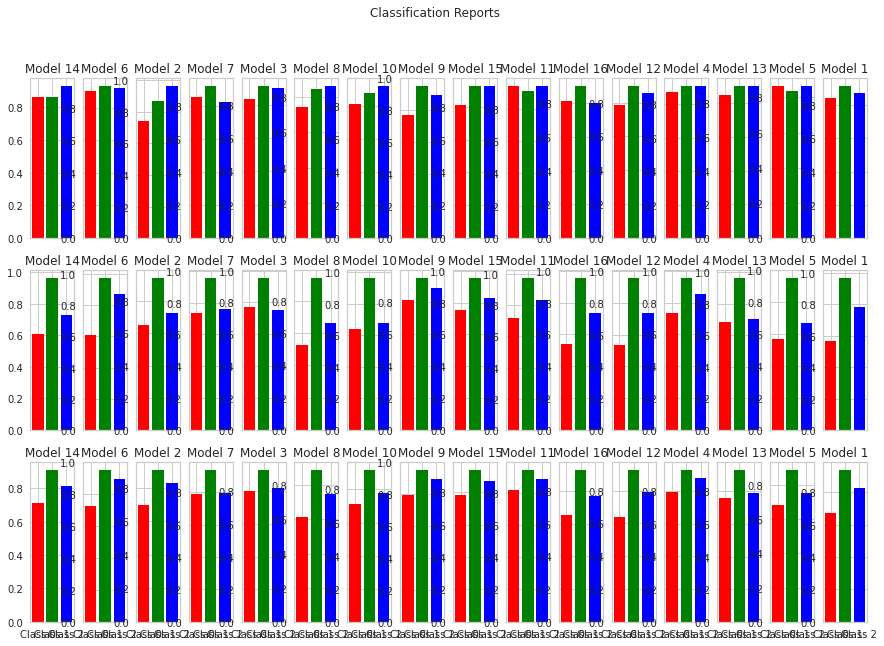

In [19]:
models = list(participant_models.keys())
metrics = ['precision', 'recall', 'f1-score']

# Plotting the bar graph
fig, axes = plt.subplots(len(metrics), len(models), figsize=(15, 10), sharex=True)
fig.suptitle('Classification Reports')

for i, metric in enumerate(metrics):
    for j, model_key in enumerate(models):
        values = [participant_models[model_key]['classification_report'][label][metric] for label in ['0', '1', '2']]
        axes[i, j].bar(['Class 0', 'Class 1', 'Class 2'], values, color=['red', 'green', 'blue'])
        axes[i, j].set_title(f'Model {model_key}')
        plt.legend()

plt.show()


In [29]:
# Assuming your participant_models dictionary is defined as shown in your previous messages
for participant_id, model_info in participant_models.items():
    xgb_model = model_info['model']
    feature_importance = xgb_model.feature_importances_

    # Print or use the feature importance for further analysis
    print(f"Participant {participant_id} Feature Importance: {feature_importance}")


Participant 14 Feature Importance: [0.00863838 0.01996261 0.01543585 0.01233643 0.00966698 0.01006328
 0.04256109 0.0150416  0.01685792 0.01229026 0.02773817 0.02607079
 0.02865872 0.03378081 0.01470038 0.0131139  0.05882466 0.01560673
 0.01565427 0.01282904 0.01972958 0.01530319 0.01765417 0.01054325
 0.0081617  0.01122088 0.00712561 0.01074042 0.01179787 0.01416383
 0.         0.         0.03053047 0.         0.         0.04138802
 0.0354238  0.02023228 0.         0.02329509 0.         0.0233657
 0.022544   0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.00358554 0.         0.         0.         0.
 0.         0.         0.         0.02770196 0.         0.02050041
 0.         0.03845227 0.01483189 0.01748848 0.02264619 0.
 0.         0.         0.         0.         0.00306302 0.03080639
 0.02907134 0.02853496 0.03026586]
Participant 6 Feature Importance: [0.01653618 0.02888527 0.01305163 0.00809916 0.0096998  0.

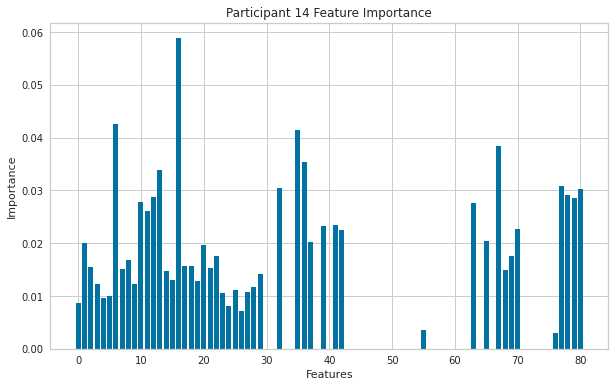

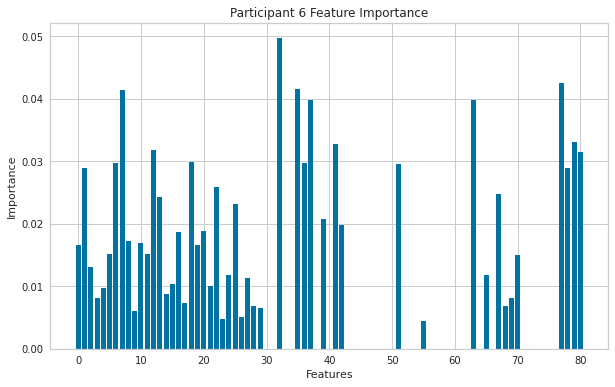

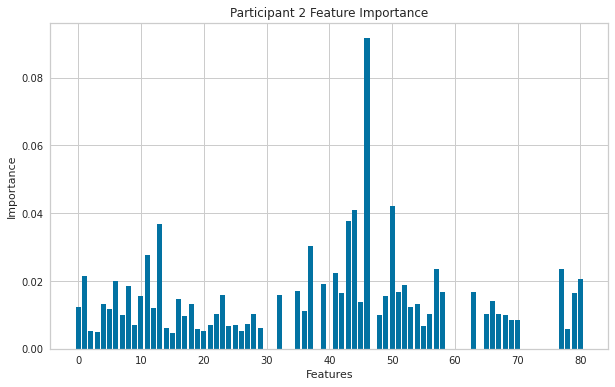

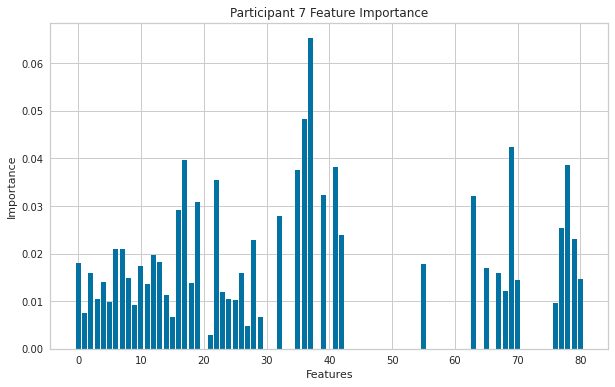

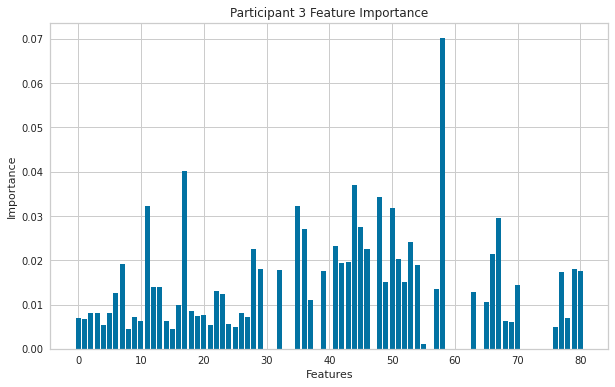

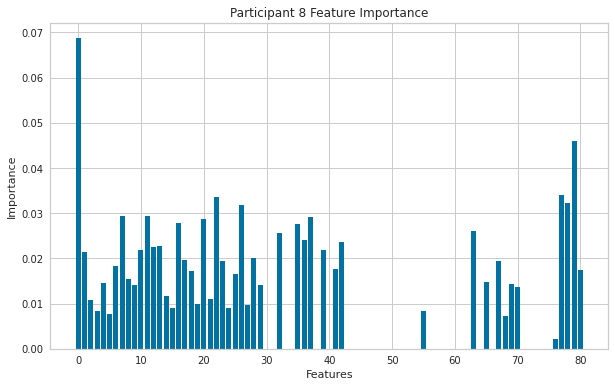

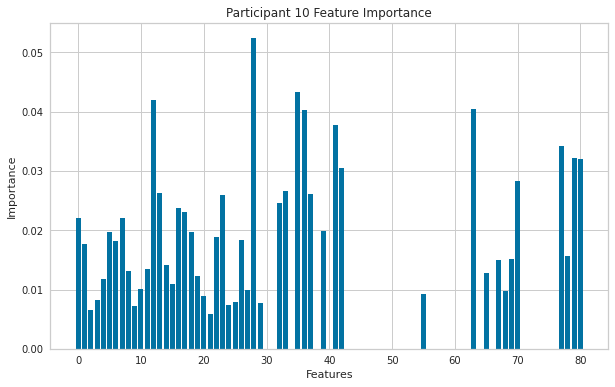

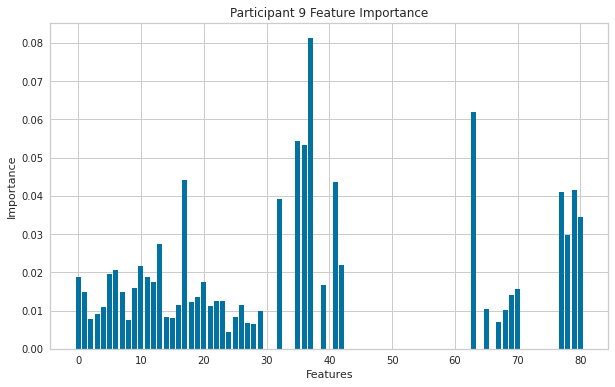

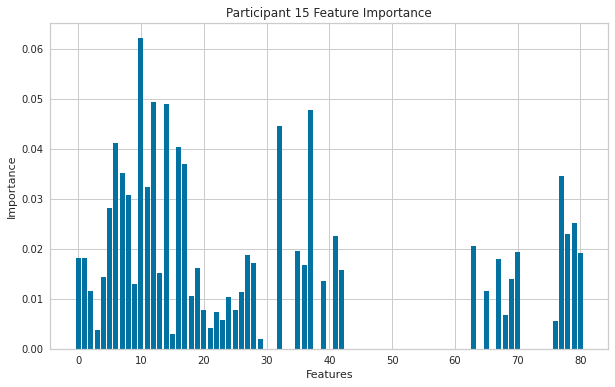

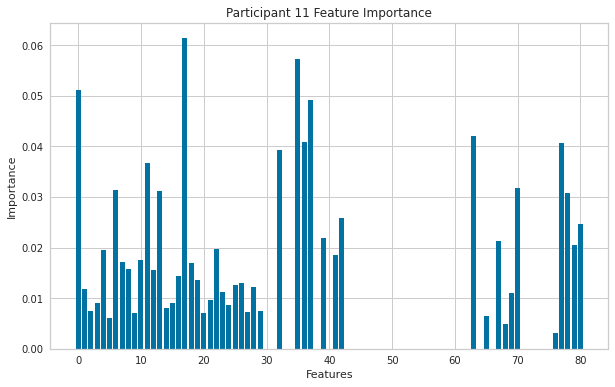

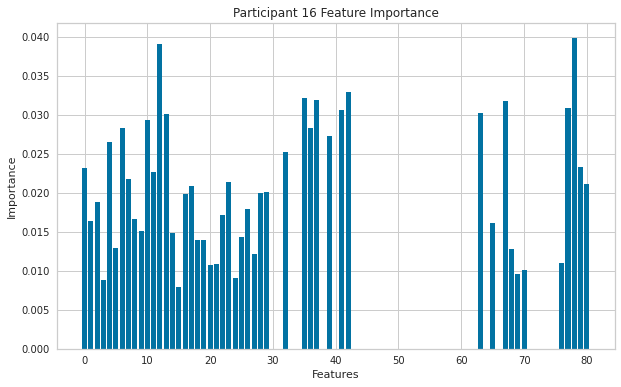

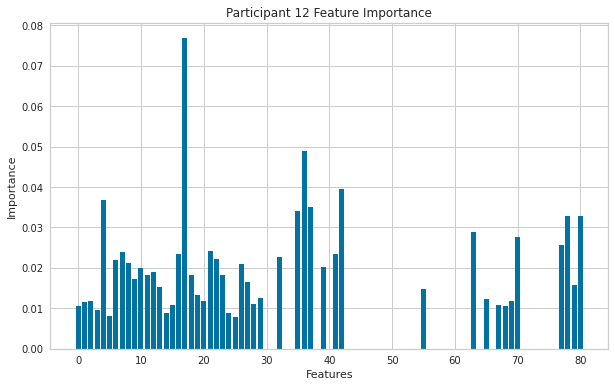

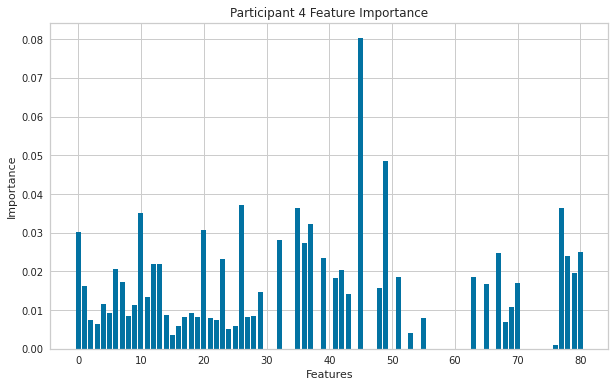

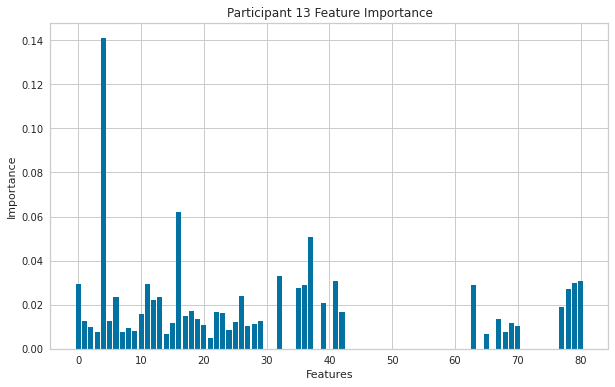

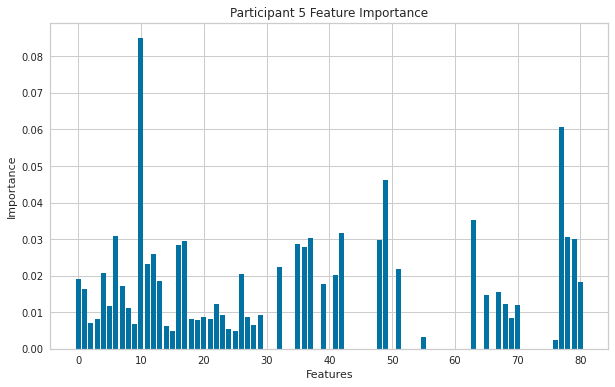

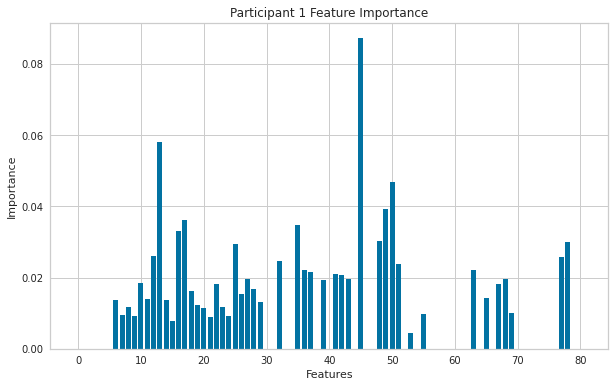

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming your participant_models dictionary is defined as shown in your previous messages
for participant_id, model_info in participant_models.items():
    xgb_model = model_info['model']
    feature_importance = xgb_model.feature_importances_

    # Create a bar plot for feature importance
    features = np.arange(len(feature_importance))
    plt.figure(figsize=(10, 6))
    plt.bar(features, feature_importance)
    plt.title(f"Participant {participant_id} Feature Importance")
    plt.xlabel("Features")
    plt.ylabel("Importance")
    plt.show()


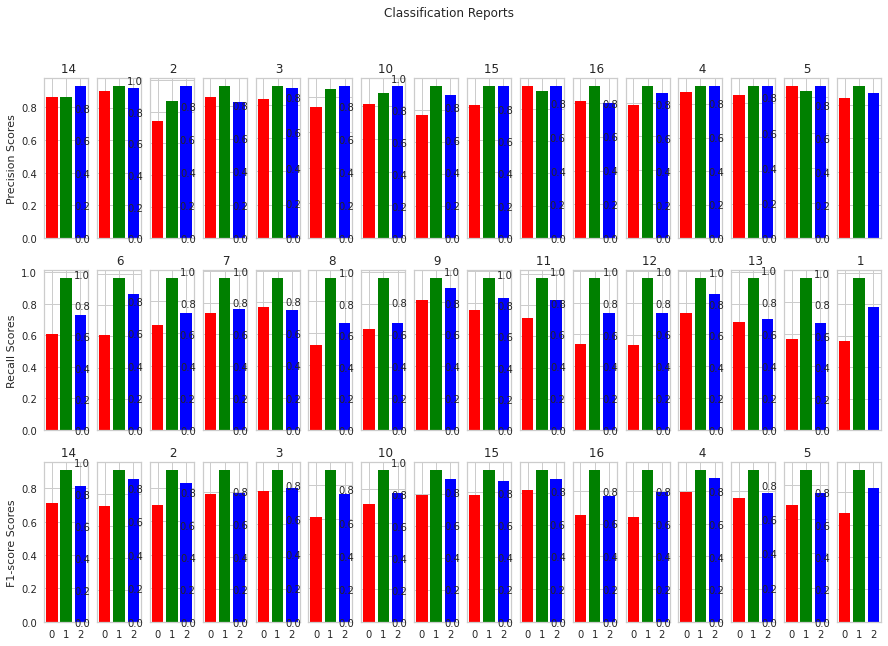

In [26]:
# Labels and metrics for the bar graph
models = list(participant_models.keys())
metrics = ['precision', 'recall', 'f1-score']

# Plotting the bar graph
fig, axes = plt.subplots(len(metrics), len(models), figsize=(15, 10), sharex='col')
fig.suptitle('Classification Reports')

# Plotting bar graphs
s=1
for j, model_key in enumerate(models):
    for i, metric in enumerate(metrics):
        values = [participant_models[model_key]['classification_report'][label][metric] for label in ['0', '1', '2']]
        axes[i, j].bar(['0', '1', '2'], values, color=['red', 'green', 'blue'])
        if s%2==1:
            axes[i, j].set_title(f' {model_key}')
            
        
        #axes[-1, j].set_xlabel(f'Model {model_key}')
        s=s+1

# Adding labels for metrics
for i, metric in enumerate(metrics):
    axes[i, 0].set_ylabel(f'{metric.capitalize()} Scores')

# Adding a common label for x-axis
#fig.text(0.5, 0.04, 'Classes', ha='center')
plt.savefig('CR.png')
plt.show()


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

# Assume '14' is the participant you're interested in
participant_id = 14
participant_data = participant_models[participant_id]
classifier = participant_data['classifier']  # Access the XGBoost classifier
X = df_features.drop(['Unnamed: 0.1', 'Unnamed: 0', 'Time', 'IG', 'Participant', 'Date', 'glucose_level'], axis=1)
y = df_features['glucose_level']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train the XGBoost classifier on the scaled data
classifier.fit(X_scaled, y)

# Plot decision boundaries
h = .02  # Step size in the mesh
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Use predict_proba to get the probabilities for each class
probas = classifier.predict_proba(np.c_[xx.ravel(), yy.ravel()])

# Plot the decision regions
plt.contourf(xx, yy, probas[:, 1].reshape(xx.shape), cmap=plt.cm.coolwarm, alpha=0.3)

# Plot the training points
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', marker='o')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')

# Add a legend
plt.legend(*scatter.legend_elements(), title="Classes")

plt.title(f'Decision Regions for Participant {participant_id} (XGBoost)')
plt.show()


KeyError: 'classifier'

KeyError: 'classifier'

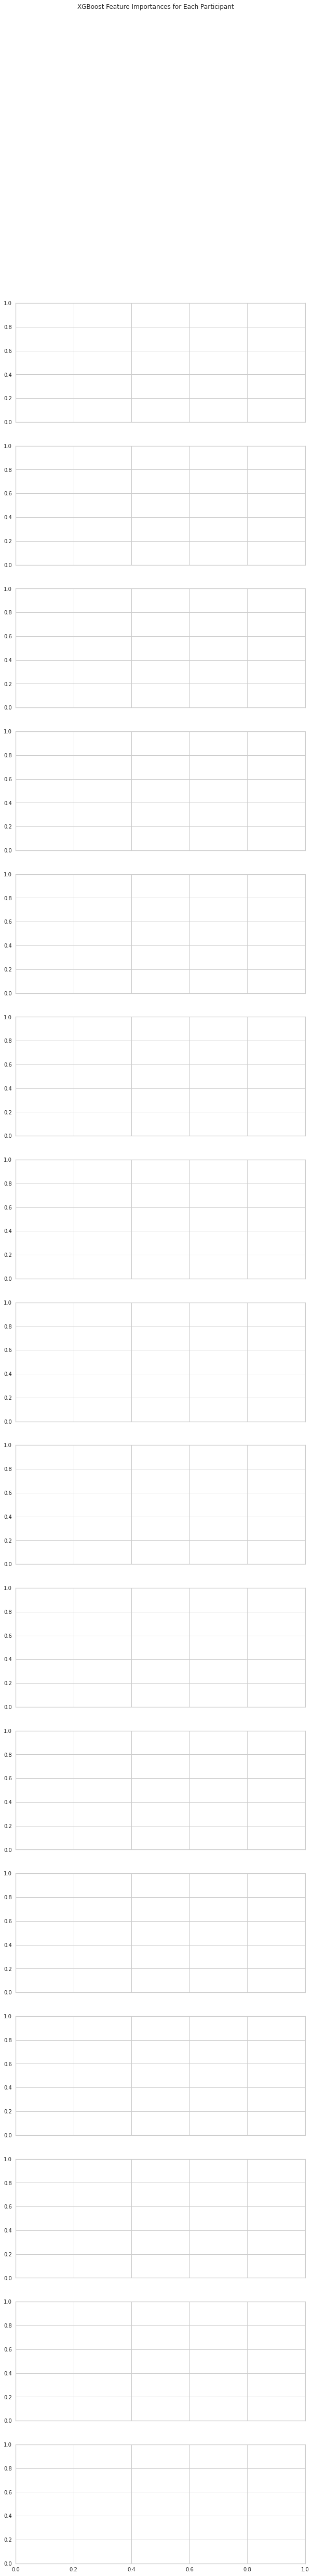

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Assuming you have already trained XGBoost models and stored them in participant_models

# Get the list of participant IDs
participant_ids = list(participant_models.keys())

# Plot feature importances for each participant
fig, axes = plt.subplots(len(participant_ids), figsize=(10, 5 * len(participant_ids)), sharex=True)
fig.suptitle('XGBoost Feature Importances for Each Participant')

for i, participant_id in enumerate(participant_ids):
    participant_data = participant_models[participant_id]
    classifier = participant_data['classifier']
    
    # Plot feature importances
    plot_importance(classifier, ax=axes[i], title=f'Participant {participant_id} Feature Importances')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
import plotly.express as px

# Assuming df_features is your DataFrame

# Extract features and target variable
X = df_features.drop(['Unnamed: 0.1', 'Unnamed: 0', 'Time', 'IG', 'Participant', 'Date', 'glucose_level'], axis=1)
y = df_features['glucose_level']

# Convert categorical target variable to numerical
y = y.map({'Low': 0, 'Normal': 1, 'High': 2})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a dictionary to store individual models
participant_models = {}

# Loop through each unique participant
for participant_id in df_features['Participant'].unique():
    # Filter data for the current participant
    participant_X_train = X_train[df_features['Participant'] == participant_id]
    participant_y_train = y_train[df_features['Participant'] == participant_id]

    participant_X_test = X_test[df_features['Participant'] == participant_id]
    participant_y_test = y_test[df_features['Participant'] == participant_id]

    # Create an XGBoost classifier with hyperparameters
    xgb_model = XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)

    # Train the model
    xgb_model.fit(participant_X_train, participant_y_train)

    # Make predictions
    participant_y_pred = xgb_model.predict(participant_X_test)

    # Evaluate the model
    classification_rep = classification_report(participant_y_test, participant_y_pred, output_dict=True)

    # Save the model to the dictionary
    participant_models[participant_id] = {
        'model': xgb_model,
        'classification_report': classification_rep
    }

# Plot classification report as a bar graph
metrics = ['precision', 'recall', 'f1-score']
class_names = sorted(y_test.unique())  # Dynamically retrieve class names from the test set

for participant_id, model_info in participant_models.items():
    model_classification_rep = model_info['classification_report']
    
    # Prepare data for plotting
    data = {'Metrics': metrics * len(class_names),
            'Values': [model_classification_rep[class_name][metric] for class_name in class_names for metric in metrics],
            'Class': [class_name for class_name in class_names for _ in metrics]}
    
    # Create a DataFrame
    df_plot = pd.DataFrame(data)

    # Plot using plotly
    fig = px.bar(df_plot, x='Class', y='Values', color='Metrics', barmode='group',
                 title=f'Classification Report - Participant {participant_id}',
                 labels={'Values': 'Score', 'Metrics': 'Metric', 'Class': 'Glucose Level'})
    
    fig.show()


/dev/shm/jobs/41802623/ipykernel_61368/3421484498.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  participant_X_train = X_train[df_features['Participant'] == participant_id]
/dev/shm/jobs/41802623/ipykernel_61368/3421484498.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  participant_X_test = X_test[df_features['Participant'] == participant_id]
/dev/shm/jobs/41802623/ipykernel_61368/3421484498.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  participant_X_train = X_train[df_features['Participant'] == participant_id]
/dev/shm/jobs/41802623/ipykernel_61368/3421484498.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  participant_X_test = X_test[df_features['Participant'] == participant_id]
/dev/shm/jobs/41802623/ipykernel_61368/3421484498.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  participant_X_train = X_t

KeyError: 0

/opt/nesi/CS400_centos7_bdw/Python/3.10.5-gimkl-2022a/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/nesi/CS400_centos7_bdw/Python/3.10.5-gimkl-2022a/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


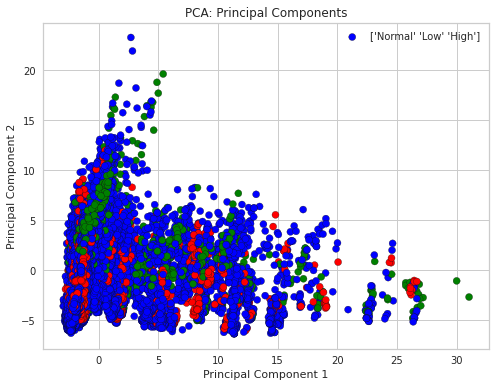

ValueError: could not convert string to float: 'Normal'

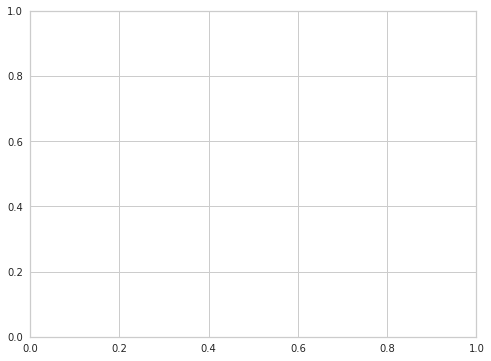

In [34]:
# Import necessary libraries
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a DataFrame called 'df' with your features

# Step 1: Separate features and target variable
X = df_features[X_cols]  # Assuming 'target' is the name of your target variable
y = df_features[Y_col]

# Step 2: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply PCA
pca = PCA(n_components=2)  # You can choose the number of components based on your requirements
X_pca = pca.fit_transform(X_scaled)

# Step 4: Visualize principal components
plt.figure(figsize=(8, 6))

# Assign a unique color to each category
colors = {'Normal': 'blue', 'Low': 'green', 'High': 'red'}  # Add more categories if needed

# Map the colors to the 'glucose_level' column
color_mapping = y.map(colors)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=color_mapping, edgecolor='k', label=y.unique())
plt.title('PCA: Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Step 5: Explore decision boundaries
# For simplicity, let's use a Support Vector Machine (SVM) as a classifier
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Plot decision boundaries
plt.figure(figsize=(8, 6))
h = .02  # Step size in the mesh
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title('Decision Boundaries')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()



In [17]:
X = df_features[[X_cols]]

KeyError: "None of [Index([('HR_Mean', 'HR_Max', 'HR_Std', 'HR_Skew', 'HR_Q1G', 'HR_Q3G', 'EDA_Mean', 'EDA_Max', 'EDA_Std', 'EDA_Skew', 'EDA_Q1G', 'EDA_Q3G', 'TEMP_Mean', 'TEMP_Max', 'TEMP_Std', 'TEMP_Skew', 'TEMP_Q1G', 'TEMP_Q3G', 'ACC_Mean', 'ACC_Max', 'ACC_Std', 'ACC_Skew', 'ACC_Q1G', 'ACC_Q3G', 'BVP_Mean', 'BVP_Max', 'BVP_Std', 'BVP_Skew', 'BVP_Q1G', 'BVP_Q3G', 'HbA1c', 'PeakEDA', 'PeakEDA_2hrsum', 'PeakEDA_2hrmean', 'maxHRV', 'minHRV', 'medianHRV', 'meanHRV', 'SDNN', 'NN50', 'pNN50', 'RMSSD', 'calories2hr', 'protien2hr', 'sugar2hr', 'carbs2hr', 'calories8r', 'protien8hr', 'sugar8hr', 'carbs8hr', 'calories24hr', 'protien24hr', 'sugar24hr', 'carbs24hr', 'Eat', 'Eatcnt2hr', 'Eatcnt8hr', 'Eatcnt24hr', 'Eatmean2hr', 'Eatmean8hr', 'Eatmean24hr', 'WakeTime', 'Minfrommid', 'Hourfrommid', 'EDA_Min', 'calories8hr', 'TEMP_Min', 'BVP_Min', 'ACC_Min', 'HR_Min', 'Wake_Time', 'HR_Mean_Historical', 'HR_Std_Historical', 'ACC_Mean_Historical', 'ACC_Std_Historical', 'Activity_Bouts', 'Activity24', 'Activity1h', 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 'Female')], dtype='object')] are in the [columns]"

In [28]:
Y_col='glucose_level'


In [29]:
df_features.columns

Index(['Time', 'IG', 'Participant', 'HR_Mean', 'HR_Max', 'HR_Std', 'HR_Skew',
       'HR_Q1G', 'HR_Q3G', 'EDA_Mean', 'EDA_Max', 'EDA_Std', 'EDA_Skew',
       'EDA_Q1G', 'EDA_Q3G', 'TEMP_Mean', 'TEMP_Max', 'TEMP_Std', 'TEMP_Skew',
       'TEMP_Q1G', 'TEMP_Q3G', 'ACC_Mean', 'ACC_Max', 'ACC_Std', 'ACC_Skew',
       'ACC_Q1G', 'ACC_Q3G', 'BVP_Mean', 'BVP_Max', 'BVP_Std', 'BVP_Skew',
       'BVP_Q1G', 'BVP_Q3G', 'Gender', 'HbA1c', 'PeakEDA', 'PeakEDA_2hrsum',
       'PeakEDA_2hrmean', 'maxHRV', 'minHRV', 'medianHRV', 'meanHRV', 'SDNN',
       'NN50', 'pNN50', 'RMSSD', 'calories2hr', 'protien2hr', 'sugar2hr',
       'carbs2hr', 'calories8r', 'protien8hr', 'sugar8hr', 'carbs8hr',
       'calories24hr', 'protien24hr', 'sugar24hr', 'carbs24hr', 'Eat',
       'Eatcnt2hr', 'Eatcnt8hr', 'Eatcnt24hr', 'Eatmean2hr', 'Eatmean8hr',
       'Eatmean24hr', 'WakeTime', 'Minfrommid', 'Hourfrommid', 'EDA_Min',
       'calories8hr', 'TEMP_Min', 'BVP_Min', 'ACC_Min', 'HR_Min', 'Wake_Time',
       'HR_Mean_His

In [30]:
X_cols=['HR_Mean','HR_Max', 'HR_Std', 'HR_Skew', 'HR_Q1G', 'HR_Q3G', 'EDA_Mean',
       'EDA_Max', 'EDA_Std', 'EDA_Skew', 'EDA_Q1G', 'EDA_Q3G', 'TEMP_Mean',
       'TEMP_Max', 'TEMP_Std', 'TEMP_Skew', 'TEMP_Q1G', 'TEMP_Q3G', 'ACC_Mean',
       'ACC_Max', 'ACC_Std', 'ACC_Skew', 'ACC_Q1G', 'ACC_Q3G', 'BVP_Mean',
       'BVP_Max', 'BVP_Std', 'BVP_Skew', 'BVP_Q1G', 'BVP_Q3G', 'HbA1c', 'PeakEDA', 'PeakEDA_2hrsum', 'PeakEDA_2hrmean', 'maxHRV',
       'minHRV', 'medianHRV', 'meanHRV', 'SDNN', 'NN50', 'pNN50', 'RMSSD',
       'calories2hr', 'protien2hr', 'sugar2hr', 'carbs2hr', 'calories8r',
       'protien8hr', 'sugar8hr', 'carbs8hr', 'calories24hr', 'protien24hr',
       'sugar24hr', 'carbs24hr', 'Eat', 'Eatcnt2hr', 'Eatcnt8hr', 'Eatcnt24hr',
       'Eatmean2hr', 'Eatmean8hr', 'Eatmean24hr', 'WakeTime', 'Minfrommid',
       'Hourfrommid', 'EDA_Min', 'calories8hr', 'TEMP_Min', 'BVP_Min',
       'ACC_Min', 'HR_Min', 'Wake_Time', 'HR_Mean_Historical',
       'HR_Std_Historical', 'ACC_Mean_Historical', 'ACC_Std_Historical',
       'Activity_Bouts', 'Activity24','Activity1h',2,3,4,5,6,7,8,9,10,
        11,12,13,14,15,16, 'Female']


In [31]:
df_features['Gender'].replace([0,1],['Female','Male'],inplace=True)

/dev/shm/jobs/41762492/ipykernel_177705/2111181843.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features['Gender'].replace([0,1],['Female','Male'],inplace=True)


In [32]:
scaler = MinMaxScaler()
df_features[numeric_features]= scaler.fit_transform(df_features[numeric_features])

/dev/shm/jobs/41762492/ipykernel_177705/3966174946.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features[numeric_features]= scaler.fit_transform(df_features[numeric_features])


In [157]:
#df_features[numeric_features]=zscore(df_features[numeric_features])

/dev/shm/jobs/39274877/ipykernel_146802/1252983518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features[numeric_features]=zscore(df_features[numeric_features])


In [33]:
# Get one hot encoding of columns B
for categories in categorical_features:
    one_hot = pd.get_dummies(df_features[categories])
    df_features = df_features.drop(categories,axis = 1)
    df_features = df_features.join(one_hot)
    
    

    


In [45]:
from sklearn import svm

import numpy as np
weights = {'Normal':1, 'High':1 , 'Low': 1}
clf = svm.SVC(class_weight=weights)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_features[X_cols], df_features[Y_col],test_size=0.3)

In [36]:
clf.fit(X_train, y_train)

/opt/nesi/CS400_centos7_bdw/Python/3.10.5-gimkl-2022a/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


SVC(class_weight={'High': 1, 'Low': 1, 'Normal': 1})

In [27]:
from yellowbrick.classifier import ConfusionMatrix

In [33]:
from sklearn.metrics import accuracy_score

In [37]:
# Make the predictions
y_predict = clf.predict(X_test)
 
# Measure the performance
print("Accuracy score %.3f" ,accuracy_score(y_test, y_predict))

/opt/nesi/CS400_centos7_bdw/Python/3.10.5-gimkl-2022a/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Accuracy score %.3f 0.7266079891672309


/opt/nesi/CS400_centos7_bdw/Python/3.10.5-gimkl-2022a/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/nesi/CS400_centos7_bdw/Python/3.10.5-gimkl-2022a/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


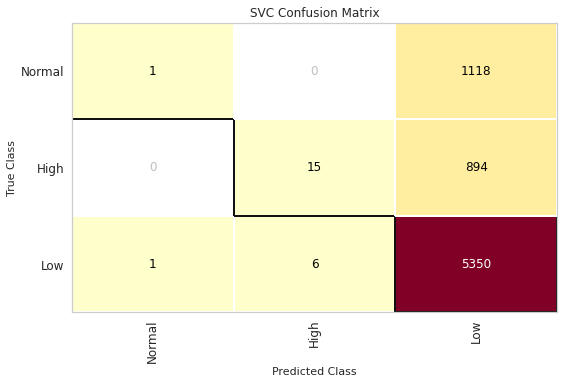

<AxesSubplot:title={'center':'SVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [39]:
cm = ConfusionMatrix(clf, classes=['Normal','High','Low'])
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

In [43]:
from yellowbrick.classifier import ClassPredictionError

/opt/nesi/CS400_centos7_bdw/Python/3.10.5-gimkl-2022a/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/nesi/CS400_centos7_bdw/Python/3.10.5-gimkl-2022a/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


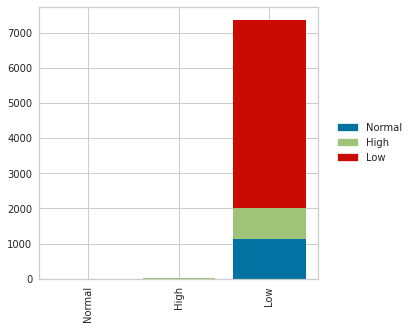

In [49]:
fig = plt.figure(figsize=(5,5),facecolor='w')


visualizer = ClassPredictionError(
    clf, classes=['Normal','High','Low']
)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization

plt.savefig("CPE.png",bbox_inches='tight',dpi=100)
plt.show()

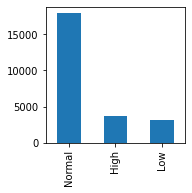

In [25]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(2.5,2.5),facecolor='w')
to_plot =  df_features['glucose_level']
to_plot.value_counts().plot.bar()
plt.savefig("freq.png",bbox_inches='tight',dpi=100)
plt.show()


In [61]:
to_plot.value_counts()

Normal    17900
High       3646
Low        3070
Name: glucose_level, dtype: int64

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Use a Gradient Boosting algorithm
alg = GradientBoostingRegressor()

# Try these hyperparameter values
params = {
 'learning_rate': [0.1, 0.5, 1.0],
 'n_estimators' : [50, 100, 150]
 }

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")

# Get the best model
model=gridsearch.best_estimator_
print(model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [16]:
import pandas as pd
from sklearn.utils import resample

# Assuming you have a DataFrame named df_features

# Separate the data into three DataFrames based on glucose_level
normal_data = df_features[df_features['glucose_level'] == 'Normal']
high_data = df_features[df_features['glucose_level'] == 'High']
low_data = df_features[df_features['glucose_level'] == 'Low']

# Downsample the "Normal" values to match the count of the other categories
normal_downsampled = resample(normal_data, 
                              replace=False,  # Set to False for downsampling
                              n_samples=3070, #atch the count
                              random_state=42)  # Set a random state for reproducibility

high_downsampled = resample(high_data, 
                              replace=False,  # Set to False for downsampling
                              n_samples=3070, #atch the count
                              random_state=42)  # Set a random state for reproducibility

low_downsampled = resample(low_data, 
                              replace=False,  # Set to False for downsampling
                              n_samples=3070, #atch the count
                              random_state=42)  # Set a random state for reproducibility
# Combine the downsampled "Normal" data with the "High" and "Low" data
df_downsampled = pd.concat([normal_downsampled, high_downsampled, low_downsampled])

In [17]:
df_downsampled



,Time,IG,Participant,HR_Mean,HR_Max,HR_Std,HR_Skew,HR_Q1G,HR_Q3G,EDA_Mean,...,HR_Std_Historical,ACC_Mean_Historical,ACC_Std_Historical,Activity_Bouts,Date,Mean,Std,glucose_level,Activity24,Activity1h
25088,2020-07-23 05:08:09,108.0,16,73.921063,79.15,2.352240,1.118123,73.090891,75.159716,0.523926,...,4.773453,63.405315,3.737230,0,2020-07-23,114.434028,16.615423,Normal,41.0,2.0
22316,2020-04-13 08:40:56,108.0,11,66.420598,73.60,2.115631,0.916779,65.605329,67.408364,0.256359,...,5.866176,63.644902,4.856004,0,2020-04-13,121.552083,19.258305,Normal,96.0,5.0
31587,2020-06-03 23:21:40,114.0,13,86.829601,135.72,18.959615,0.510443,78.450397,96.023176,4.961092,...,5.344831,63.851523,3.956639,0,2020-06-03,135.267361,21.839485,Normal,78.0,38.0
5431,2020-02-22 16:13:33,103.0,2,98.964219,101.75,1.682070,-0.642704,98.236811,99.699785,2.299155,...,3.532365,64.799995,2.911374,1,2020-02-22,125.517361,24.141707,Normal,124.0,48.0
31027,2020-06-02 00:41:46,131.0,13,62.077209,64.62,1.630463,-0.132724,61.294429,62.815572,0.239129,...,5.344831,63.851523,3.956639,0,2020-06-02,128.638889,31.265105,Normal,121.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20598,2020-04-07 08:26:06,71.0,11,106.988306,132.32,12.978533,0.154278,101.021489,112.649745,0.763627,...,5.866176,63.644902,4.856004,1,2020-04-07,117.482639,26.277261,Low,130.0,11.0
14219,2020-03-22 12:39:18,100.0,10,88.044651,108.00,12.282210,0.220374,82.617247,94.042822,3.012508,...,6.904142,64.261096,4.049179,1,2020-03-22,119.932886,14.119980,Low,11.0,11.0
14776,2020-03-24 17:39:13,69.0,10,64.071960,76.97,5.765078,1.138782,62.011066,67.082059,2.335117,...,6.904142,64.261096,4.049179,0,2020-03-24,96.903509,13.965956,Low,78.0,32.0
16381,2020-03-21 13:31:50,99.0,9,94.046877,128.47,18.380775,0.476670,85.953351,103.197298,0.144788,...,5.934565,65.848404,5.599389,1,2020-03-21,131.877419,31.067655,Low,23.0,23.0


In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_downsampled[numeric_features]= scaler.fit_transform(df_downsampled[numeric_features])

In [19]:
for categories in categorical_features:
    one_hot = pd.get_dummies(df_downsampled[categories])
    df_downsampled = df_downsampled.drop(categories,axis = 1)
    df_downsampled = df_downsampled.join(one_hot)
    
    

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( df_downsampled[X_cols], df_downsampled[Y_col],test_size=0.3)
clf = svm.SVC()


NameError: name 'svm' is not defined

In [56]:
clf.fit(X_train, y_train)

/opt/nesi/CS400_centos7_bdw/Python/3.10.5-gimkl-2022a/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


SVC()

In [57]:
# Make the predictions
y_predict = clf.predict(X_test)
 
# Measure the performance
print("Accuracy score %.3f" ,accuracy_score(y_test, y_predict))

/opt/nesi/CS400_centos7_bdw/Python/3.10.5-gimkl-2022a/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Accuracy score %.3f 0.571480275063337


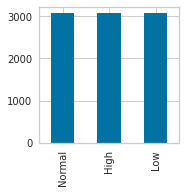

In [53]:
fig = plt.figure(figsize=(2.5,2.5),facecolor='w')
to_plot =  df_downsampled['glucose_level']
to_plot.value_counts().plot.bar()

#to_plot =  df_features['glucose_level']
#to_plot.value_counts().plot.bar()
plt.savefig("freq_balanced.png",bbox_inches='tight',dpi=100)
plt.show()


In [276]:
scaler = MinMaxScaler()
df_downsampled[numeric_features]= scaler.fit_transform(df_downsampled[numeric_features])

In [ ]:
scaler = MinMaxScaler()
df_features[numeric_features]= scaler.fit_transform(df_features[numeric_features])

/opt/nesi/CS400_centos7_bdw/Python/3.10.5-gimkl-2022a/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/nesi/CS400_centos7_bdw/Python/3.10.5-gimkl-2022a/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


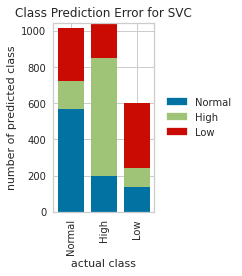

<AxesSubplot:title={'center':'Class Prediction Error for SVC'}, xlabel='actual class', ylabel='number of predicted class'>

In [61]:
fig = plt.figure(figsize=(4,4),facecolor='w')
visualizer = ClassPredictionError(
    clf, classes=['Normal','High','Low']
)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)
plt.savefig("cpe.png",bbox_inches='tight',dpi=100)

# Draw visualization
visualizer.show()


/opt/nesi/CS400_centos7_bdw/Python/3.10.5-gimkl-2022a/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/nesi/CS400_centos7_bdw/Python/3.10.5-gimkl-2022a/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


<AxesSubplot:title={'center':'ROC Curves for SVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

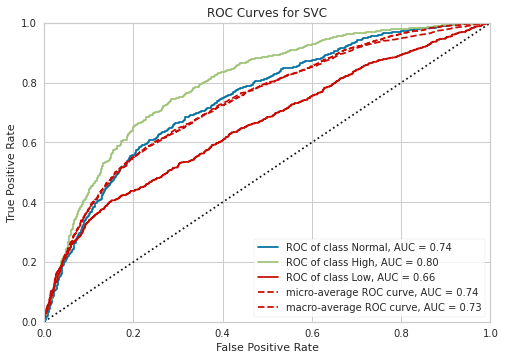

In [75]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(clf, classes=['Normal','High','Low'])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
#visualizer.savefig("roc_cm.png",bbox_inches='tight',dpi=100)
visualizer.show(outpath="kelbow_minibatchkmeans.png")                       # Finalize and show the figure

In [71]:
import numpy as np
weights = {'Normal':1
           , 'High':1 , 'Low': 1}
clf = svm.SVC(class_weight=weights)

/opt/nesi/CS400_centos7_bdw/Python/3.10.5-gimkl-2022a/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/nesi/CS400_centos7_bdw/Python/3.10.5-gimkl-2022a/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


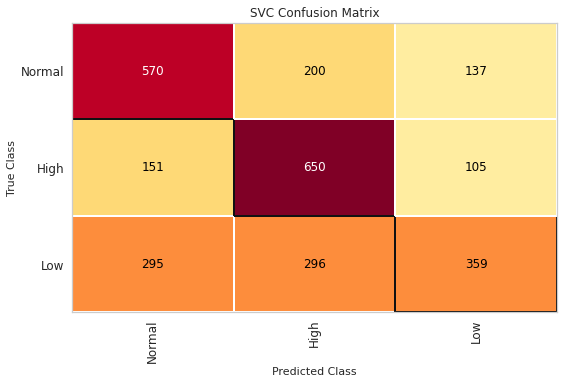

<AxesSubplot:title={'center':'SVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [63]:
cm = ConfusionMatrix(clf, classes=['Normal','High','Low'])
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
plt.savefig("svc_cm.png",bbox_inches='tight',dpi=100)
cm.show()

In [23]:
from sklearn.tree import DecisionTreeClassifier


In [28]:
tree = DecisionTreeClassifier(random_state=0)

/opt/nesi/CS400_centos7_bdw/Python/3.10.5-gimkl-2022a/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/nesi/CS400_centos7_bdw/Python/3.10.5-gimkl-2022a/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/nesi/CS400_centos7_bdw/Python/3.10.5-gimkl-2022a/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the follow

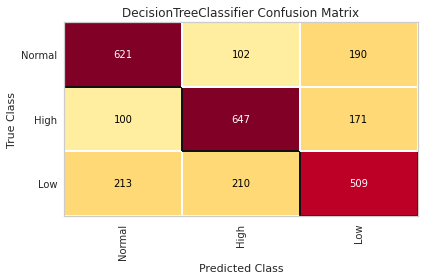

<AxesSubplot:title={'center':'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [29]:
cm = ConfusionMatrix(tree, classes=['Normal','High','Low'])
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
plt.savefig("svc_cm.png",bbox_inches='tight',dpi=100)
cm.show()

In [32]:
y_predict = tree.predict(X_test)
 
# Measure the performance
print("Accuracy score %.3f" ,accuracy_score(y_test, y_predict))

Accuracy score %.3f 0.6431415128483532


/opt/nesi/CS400_centos7_bdw/Python/3.10.5-gimkl-2022a/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


/opt/nesi/CS400_centos7_bdw/Python/3.10.5-gimkl-2022a/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/nesi/CS400_centos7_bdw/Python/3.10.5-gimkl-2022a/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

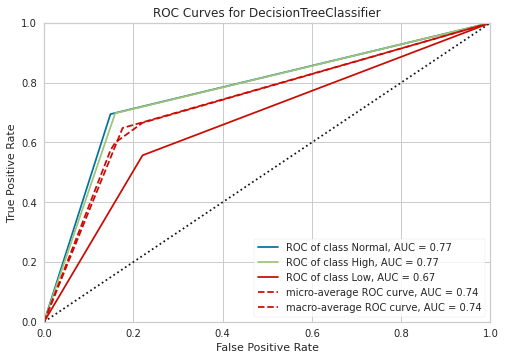

In [76]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(tree, classes=['Normal','High','Low'])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
#visualizer.savefig("roc_cm.png",bbox_inches='tight',dpi=100)
visualizer.show(outpath="kelbow_minibatchkmeans.png")

/opt/nesi/CS400_centos7_bdw/Python/3.10.5-gimkl-2022a/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/nesi/CS400_centos7_bdw/Python/3.10.5-gimkl-2022a/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


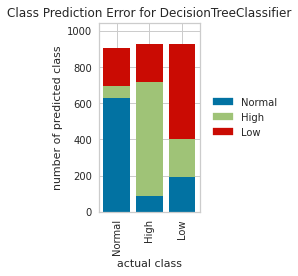

<AxesSubplot:title={'center':'Class Prediction Error for DecisionTreeClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [68]:
fig = plt.figure(figsize=(4,4),facecolor='w')
visualizer = ClassPredictionError(
    tree, classes=['Normal','High','Low']
)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)
plt.savefig("cpe.png",bbox_inches='tight',dpi=100)

# Draw visualization
visualizer.show()

In [52]:
from sklearn.svm import SVC

In [319]:
sv=SVC(kernel="linear", C=0.025)

/opt/nesi/CS400_centos7_bdw/Python/3.10.5-gimkl-2022a/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/nesi/CS400_centos7_bdw/Python/3.10.5-gimkl-2022a/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/nesi/CS400_centos7_bdw/Python/3.10.5-gimkl-2022a/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


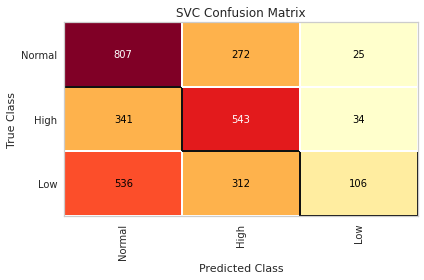

<AxesSubplot:title={'center':'SVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [320]:
cm = ConfusionMatrix(sv, classes=['Normal','High','Low'])
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

In [321]:
y_predict = tree.predict(X_test)
 
# Measure the performance
print("Accuracy score %.3f" ,accuracy_score(y_test, y_predict))

Accuracy score %.3f 0.6381048387096774


/opt/nesi/CS400_centos7_bdw/Python/3.10.5-gimkl-2022a/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [322]:
svc_new=SVC(gamma=2, C=1)

/opt/nesi/CS400_centos7_bdw/Python/3.10.5-gimkl-2022a/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/nesi/CS400_centos7_bdw/Python/3.10.5-gimkl-2022a/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/nesi/CS400_centos7_bdw/Python/3.10.5-gimkl-2022a/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


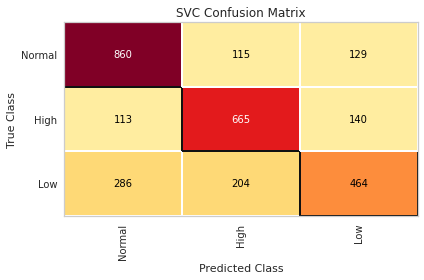

<AxesSubplot:title={'center':'SVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [323]:
cm = ConfusionMatrix(svc_new, classes=['Normal','High','Low'])
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

In [324]:
y_predict = svc_new.predict(X_test)
 
# Measure the performance
print("Accuracy score %.3f" ,accuracy_score(y_test, y_predict))

/opt/nesi/CS400_centos7_bdw/Python/3.10.5-gimkl-2022a/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Accuracy score %.3f 0.6683467741935484


In [335]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(3)

/opt/nesi/CS400_centos7_bdw/Python/3.10.5-gimkl-2022a/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/nesi/CS400_centos7_bdw/Python/3.10.5-gimkl-2022a/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/nesi/CS400_centos7_bdw/Python/3.10.5-gimkl-2022a/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


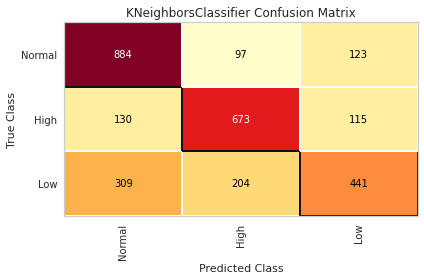

<AxesSubplot:title={'center':'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [336]:
cm = ConfusionMatrix(knn, classes=['Normal','High','Low'])
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

In [337]:
y_predict = knn.predict(X_test)
 
# Measure the performance
print("Accuracy score %.3f" ,accuracy_score(y_test, y_predict))

/opt/nesi/CS400_centos7_bdw/Python/3.10.5-gimkl-2022a/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Accuracy score %.3f 0.6713709677419355


In [339]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
gpc=GaussianProcessClassifier(1.0 * RBF(1.0))

In [340]:
cm = ConfusionMatrix(gpc, classes=['Normal','High','Low'])
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

/opt/nesi/CS400_centos7_bdw/Python/3.10.5-gimkl-2022a/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
y_predict = gpc.predict(X_test)
 
# Measure the performance
print("Accuracy score %.3f" ,accuracy_score(y_test, y_predict))

In [341]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

In [342]:
ada=AdaBoostClassifier()

/opt/nesi/CS400_centos7_bdw/Python/3.10.5-gimkl-2022a/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/nesi/CS400_centos7_bdw/Python/3.10.5-gimkl-2022a/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/nesi/CS400_centos7_bdw/Python/3.10.5-gimkl-2022a/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


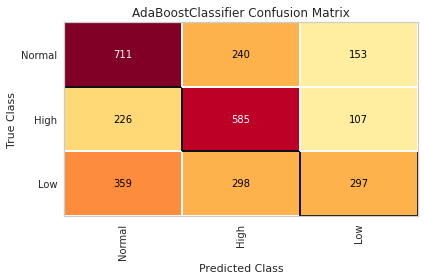

<AxesSubplot:title={'center':'AdaBoostClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [343]:
cm = ConfusionMatrix(ada, classes=['Normal','High','Low'])
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

In [344]:
from yellowbrick.classifier import ClassificationReport

/opt/nesi/CS400_centos7_bdw/Python/3.10.5-gimkl-2022a/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/nesi/CS400_centos7_bdw/Python/3.10.5-gimkl-2022a/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/nesi/CS400_centos7_bdw/Python/3.10.5-gimkl-2022a/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/nesi/CS400_centos7_bdw/Python/3.10.5-gimkl-2022a/lib/python3.10/site-packa

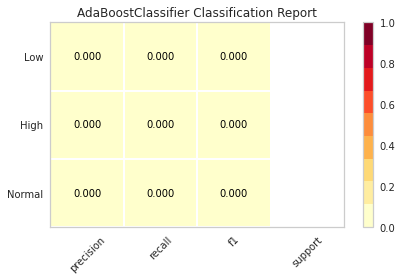

<AxesSubplot:title={'center':'AdaBoostClassifier Classification Report'}>

In [345]:
visualizer = ClassificationReport(ada, classes=['Normal','High','Low'], support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

In [346]:
tree = DecisionTreeClassifier(random_state=0)

/opt/nesi/CS400_centos7_bdw/Python/3.10.5-gimkl-2022a/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/nesi/CS400_centos7_bdw/Python/3.10.5-gimkl-2022a/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/nesi/CS400_centos7_bdw/Python/3.10.5-gimkl-2022a/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/nesi/CS400_centos7_bdw/Python/3.10.5-gimkl-2022a/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Pre

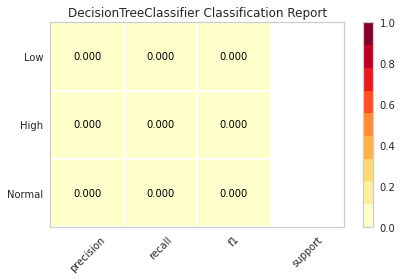

<AxesSubplot:title={'center':'DecisionTreeClassifier Classification Report'}>

In [347]:
visualizer = ClassificationReport(tree, classes=['Normal','High','Low'], support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()       

In [79]:
importances=tree.feature_importances_
importances*100

array([0.77356654, 1.00324882, 0.97927413, 1.06157725, 0.6623205 ,
       0.92593121, 0.89014   , 1.42802563, 1.72332102, 1.00106901,
       1.38068866, 3.88196746, 0.48453538, 1.94643791, 1.61225426,
       1.15046064, 0.97512918, 1.46224659, 2.05410332, 1.12975715,
       1.73719137, 0.9720256 , 1.34941767, 1.26567654, 1.69272231,
       1.04263138, 1.68017852, 0.81180206, 0.74846408, 0.76649285,
       0.        , 3.37571982, 0.        , 0.        , 4.3446203 ,
       2.71811604, 2.89171673, 0.        , 2.53769848, 0.        ,
       4.26160155, 4.37273953, 0.27172948, 0.        , 0.09855602,
       0.04395009, 0.        , 0.45693676, 0.01376631, 0.06829119,
       0.5181362 , 0.        , 0.18420259, 0.09878654, 0.10000453,
       0.        , 0.        , 0.03988748, 0.        , 0.10445281,
       0.233292  , 0.        , 7.79418334, 2.68812192, 1.30888486,
       0.07445663, 1.15532739, 0.79551006, 0.79279205, 2.03365014,
       0.        , 2.91556125, 2.37792322, 0.69951184, 1.45534

In [349]:
tree.class_weight

In [356]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis

In [353]:
qda=QuadraticDiscriminantAnalysis()

/opt/nesi/CS400_centos7_bdw/Python/3.10.5-gimkl-2022a/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/nesi/CS400_centos7_bdw/Python/3.10.5-gimkl-2022a/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/nesi/CS400_centos7_bdw/Python/3.10.5-gimkl-2022a/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/nesi/CS400_centos7_bdw/Python/3.10.5-gimkl-2022a/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str'].

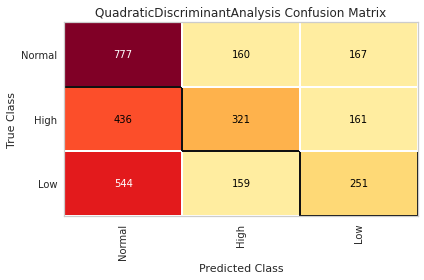

<AxesSubplot:title={'center':'QuadraticDiscriminantAnalysis Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [354]:
cm = ConfusionMatrix(qda, classes=['Normal','High','Low'])
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

In [357]:
lda=LinearDiscriminantAnalysis()

/opt/nesi/CS400_centos7_bdw/Python/3.10.5-gimkl-2022a/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/nesi/CS400_centos7_bdw/Python/3.10.5-gimkl-2022a/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/nesi/CS400_centos7_bdw/Python/3.10.5-gimkl-2022a/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


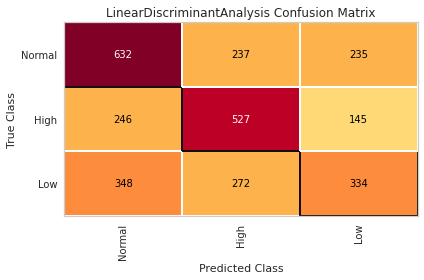

<AxesSubplot:title={'center':'LinearDiscriminantAnalysis Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [358]:
cm = ConfusionMatrix(lda, classes=['Normal','High','Low'])
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

In [54]:
from sklearn.model_selection import StratifiedKFold

In [55]:
skf = StratifiedKFold(n_splits=2)

In [56]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

In [57]:
clf = SVC(gamma=2, C=1)

# Define the repeated stratified k-fold cross-validation
n_splits = 10  # Number of splits
n_repeats = 3  # Number of repeats

rskf = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)

# Initialize a list to store the cross-validation results
results = []

# Perform repeated stratified k-fold cross-validation
for train_index, test_index in rskf.split(df_downsampled[X_cols], df_downsampled[Y_col]):
    X_train, X_test = df_downsampled[X_cols].iloc[train_index],df_downsampled[X_cols].iloc[test_index]
    y_train, y_test = df_downsampled[Y_col].iloc[train_index], df_downsampled[Y_col].iloc[test_index]

    # Fit the classifier on the training data
    clf.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Calculate accuracy (you can use other evaluation metrics as needed)
    accuracy = accuracy_score(y_test, y_pred)
    #precision_re=precision_recall_fscore_support(y_true, y_pred, average='macro')

    # Append the accuracy to the results list
    results.append(accuracy)

# Calculate the mean and standard deviation of the cross-validation results
mean_accuracy = np.mean(results)
std_accuracy = np.std(results)

# Print the results
print(f'Mean Accuracy: {mean_accuracy}')
print(f'Standard Deviation: {std_accuracy}')

/opt/nesi/CS400_centos7_bdw/Python/3.10.5-gimkl-2022a/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/nesi/CS400_centos7_bdw/Python/3.10.5-gimkl-2022a/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/nesi/CS400_centos7_bdw/Python/3.10.5-gimkl-2022a/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/nesi/CS400_centos7_bdw/Python/3.10.5-gimkl-2022a/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only 

Mean Accuracy: 0.4135360115816142
Standard Deviation: 0.010130292513082768


In [81]:
from sklearn.metrics import classification_report

In [83]:
clf = DecisionTreeClassifier()

# Define the repeated stratified k-fold cross-validation
n_splits = 10  # Number of splits
n_repeats = 3  # Number of repeats

rskf = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)

# Initialize a list to store the cross-validation results
precision_scores = []
recall_scores = []
f1_scores = []
support_scores = []

results = []
# Perform repeated stratified k-fold cross-validation
for train_index, test_index in rskf.split(df_downsampled[X_cols], df_downsampled[Y_col]):
    X_train, X_test = df_downsampled[X_cols].iloc[train_index],df_downsampled[X_cols].iloc[test_index]
    y_train, y_test = df_downsampled[Y_col].iloc[train_index], df_downsampled[Y_col].iloc[test_index]

    # Fit the classifier on the training data
    clf.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Calculate accuracy (you can use other evaluation metrics as needed)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    # Append the accuracy to the results list
    results.append(accuracy)
    precision_scores.append(report['weighted avg']['precision'])
    recall_scores.append(report['weighted avg']['recall'])
    f1_scores.append(report['weighted avg']['f1-score'])
    support_scores.append(report['weighted avg']['support'])

# Calculate the mean and standard deviation of the cross-validation results
mean_precision = np.mean(precision_scores)
std_precision = np.std(precision_scores)
mean_recall = np.mean(recall_scores)
std_recall = np.std(recall_scores)
mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)
mean_support = np.mean(support_scores)
std_support = np.std(support_scores)

# Print the results
print(f'Mean Precision: {mean_precision}, Std Precision: {std_precision}')
print(f'Mean Recall: {mean_recall}, Std Recall: {std_recall}')
print(f'Mean F1 Score: {mean_f1}, Std F1 Score: {std_f1}')
print(f'Mean Support: {mean_support}, Std Support: {std_support}')

/opt/nesi/CS400_centos7_bdw/Python/3.10.5-gimkl-2022a/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/nesi/CS400_centos7_bdw/Python/3.10.5-gimkl-2022a/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/nesi/CS400_centos7_bdw/Python/3.10.5-gimkl-2022a/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/nesi/CS400_centos7_bdw/Python/3.10.5-gimkl-2022a/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only 

Mean Precision: 0.6916216421440935, Std Precision: 0.024850877520586054
Mean Recall: 0.6922547955121245, Std Recall: 0.025201058601318174
Mean F1 Score: 0.6915403702672953, Std F1 Score: 0.025016189422023435
Mean Support: 921.0, Std Support: 0.0


/opt/nesi/CS400_centos7_bdw/Python/3.10.5-gimkl-2022a/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [51]:
clf  = SVC(gamma=2, C=1)

# Define the repeated stratified k-fold cross-validation
n_splits = 10  # Number of splits
n_repeats = 3  # Number of repeats

rskf = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)

# Initialize a list to store the cross-validation results
precision_scores = []
recall_scores = []
f1_scores = []
support_scores = []

results = []
# Perform repeated stratified k-fold cross-validation
for train_index, test_index in rskf.split(df_downsampled[X_cols], df_downsampled[Y_col]):
    X_train, X_test = df_downsampled[X_cols].iloc[train_index],df_downsampled[X_cols].iloc[test_index]
    y_train, y_test = df_downsampled[Y_col].iloc[train_index], df_downsampled[Y_col].iloc[test_index]

    # Fit the classifier on the training data
    clf.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Calculate accuracy (you can use other evaluation metrics as needed)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    # Append the accuracy to the results list
    results.append(accuracy)
    precision_scores.append(report['weighted avg']['precision'])
    recall_scores.append(report['weighted avg']['recall'])
    f1_scores.append(report['weighted avg']['f1-score'])
    support_scores.append(report['weighted avg']['support'])

# Calculate the mean and standard deviation of the cross-validation results
mean_precision = np.mean(precision_scores)
std_precision = np.std(precision_scores)
mean_recall = np.mean(recall_scores)
std_recall = np.std(recall_scores)
mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)
mean_support = np.mean(support_scores)
std_support = np.std(support_scores)

# Print the results
print(f'Mean Precision: {mean_precision}, Std Precision: {std_precision}')
print(f'Mean Recall: {mean_recall}, Std Recall: {std_recall}')
print(f'Mean F1 Score: {mean_f1}, Std F1 Score: {std_f1}')
print(f'Mean Support: {mean_support}, Std Support: {std_support}')

NameError: name 'SVC' is not defined

In [ ]:
clf = DecisionTreeClassifier()

# Define the repeated stratified k-fold cross-validation
n_splits = 10  # Number of splits
n_repeats = 3  # Number of repeats

rskf = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)

# Initialize a list to store the cross-validation results
precision_scores = []
recall_scores = []
f1_scores = []
support_scores = []

results = []
# Perform repeated stratified k-fold cross-validation
for train_index, test_index in rskf.split(df_downsampled[X_cols], df_downsampled[Y_col]):
    X_train, X_test = df_downsampled[X_cols].iloc[train_index],df_downsampled[X_cols].iloc[test_index]
    y_train, y_test = df_downsampled[Y_col].iloc[train_index], df_downsampled[Y_col].iloc[test_index]

    # Fit the classifier on the training data
    clf.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Calculate accuracy (you can use other evaluation metrics as needed)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    # Append the accuracy to the results list
    results.append(accuracy)
    precision_scores.append(report['weighted avg']['precision'])
    recall_scores.append(report['weighted avg']['recall'])
    f1_scores.append(report['weighted avg']['f1-score'])
    support_scores.append(report['weighted avg']['support'])

# Calculate the mean and standard deviation of the cross-validation results
mean_precision = np.mean(precision_scores)
std_precision = np.std(precision_scores)
mean_recall = np.mean(recall_scores)
std_recall = np.std(recall_scores)
mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)
mean_support = np.mean(support_scores)
std_support = np.std(support_scores)

# Print the results
print(f'Mean Precision: {mean_precision}, Std Precision: {std_precision}')
print(f'Mean Recall: {mean_recall}, Std Recall: {std_recall}')
print(f'Mean F1 Score: {mean_f1}, Std F1 Score: {std_f1}')
print(f'Mean Support: {mean_support}, Std Support: {std_support}')

In [50]:
X_cols=['HR_Mean','HR_Max', 'HR_Std', 'HR_Skew', 'HR_Q1G', 'HR_Q3G', 'EDA_Mean',
       'EDA_Max', 'EDA_Std', 'EDA_Skew', 'EDA_Q1G', 'EDA_Q3G', 'TEMP_Mean',
       'TEMP_Max', 'TEMP_Std', 'TEMP_Skew', 'TEMP_Q1G', 'TEMP_Q3G', 'ACC_Mean',
       'ACC_Max', 'ACC_Std', 'ACC_Skew', 'ACC_Q1G', 'ACC_Q3G', 'BVP_Mean',
       'BVP_Max', 'BVP_Std', 'BVP_Skew', 'BVP_Q1G', 'BVP_Q3G', 'HbA1c', 'PeakEDA', 'PeakEDA_2hrsum', 'PeakEDA_2hrmean', 'maxHRV',
       'minHRV', 'medianHRV', 'meanHRV', 'SDNN', 'NN50', 'pNN50', 'RMSSD',
       'calories2hr', 'protien2hr', 'sugar2hr', 'carbs2hr', 'calories8r',
       'protien8hr', 'sugar8hr', 'carbs8hr', 'calories24hr', 'protien24hr',
       'sugar24hr', 'carbs24hr', 'Eat', 'Eatcnt2hr', 'Eatcnt8hr', 'Eatcnt24hr',
       'Eatmean2hr', 'Eatmean8hr', 'Eatmean24hr', 'WakeTime', 'Minfrommid',
       'Hourfrommid', 'EDA_Min', 'calories8hr', 'TEMP_Min', 'BVP_Min',
       'ACC_Min', 'HR_Min', 'Wake_Time', 'HR_Mean_Historical',
       'HR_Std_Historical', 'ACC_Mean_Historical', 'ACC_Std_Historical',
       'Activity_Bouts', 'Activity24','Activity1h',2,3,4,5,6,7,8,9,10,
        11,12,13,14,15,16, 'Female']
print(X_cols)

['HR_Mean', 'HR_Max', 'HR_Std', 'HR_Skew', 'HR_Q1G', 'HR_Q3G', 'EDA_Mean', 'EDA_Max', 'EDA_Std', 'EDA_Skew', 'EDA_Q1G', 'EDA_Q3G', 'TEMP_Mean', 'TEMP_Max', 'TEMP_Std', 'TEMP_Skew', 'TEMP_Q1G', 'TEMP_Q3G', 'ACC_Mean', 'ACC_Max', 'ACC_Std', 'ACC_Skew', 'ACC_Q1G', 'ACC_Q3G', 'BVP_Mean', 'BVP_Max', 'BVP_Std', 'BVP_Skew', 'BVP_Q1G', 'BVP_Q3G', 'HbA1c', 'PeakEDA', 'PeakEDA_2hrsum', 'PeakEDA_2hrmean', 'maxHRV', 'minHRV', 'medianHRV', 'meanHRV', 'SDNN', 'NN50', 'pNN50', 'RMSSD', 'calories2hr', 'protien2hr', 'sugar2hr', 'carbs2hr', 'calories8r', 'protien8hr', 'sugar8hr', 'carbs8hr', 'calories24hr', 'protien24hr', 'sugar24hr', 'carbs24hr', 'Eat', 'Eatcnt2hr', 'Eatcnt8hr', 'Eatcnt24hr', 'Eatmean2hr', 'Eatmean8hr', 'Eatmean24hr', 'WakeTime', 'Minfrommid', 'Hourfrommid', 'EDA_Min', 'calories8hr', 'TEMP_Min', 'BVP_Min', 'ACC_Min', 'HR_Min', 'Wake_Time', 'HR_Mean_Historical', 'HR_Std_Historical', 'ACC_Mean_Historical', 'ACC_Std_Historical', 'Activity_Bouts', 'Activity24', 'Activity1h', 2, 3, 4, 5, 6,

In [90]:
tree.feature_importances_*100

array([0.77356654, 1.00324882, 0.97927413, 1.06157725, 0.6623205 ,
       0.92593121, 0.89014   , 1.42802563, 1.72332102, 1.00106901,
       1.38068866, 3.88196746, 0.48453538, 1.94643791, 1.61225426,
       1.15046064, 0.97512918, 1.46224659, 2.05410332, 1.12975715,
       1.73719137, 0.9720256 , 1.34941767, 1.26567654, 1.69272231,
       1.04263138, 1.68017852, 0.81180206, 0.74846408, 0.76649285,
       0.        , 3.37571982, 0.        , 0.        , 4.3446203 ,
       2.71811604, 2.89171673, 0.        , 2.53769848, 0.        ,
       4.26160155, 4.37273953, 0.27172948, 0.        , 0.09855602,
       0.04395009, 0.        , 0.45693676, 0.01376631, 0.06829119,
       0.5181362 , 0.        , 0.18420259, 0.09878654, 0.10000453,
       0.        , 0.        , 0.03988748, 0.        , 0.10445281,
       0.233292  , 0.        , 7.79418334, 2.68812192, 1.30888486,
       0.07445663, 1.15532739, 0.79551006, 0.79279205, 2.03365014,
       0.        , 2.91556125, 2.37792322, 0.69951184, 1.45534

In [91]:
df_downsampled.columns

Index([               'Time',                  'IG',             'HR_Mean',
                    'HR_Max',              'HR_Std',             'HR_Skew',
                    'HR_Q1G',              'HR_Q3G',            'EDA_Mean',
                   'EDA_Max',             'EDA_Std',            'EDA_Skew',
                   'EDA_Q1G',             'EDA_Q3G',           'TEMP_Mean',
                  'TEMP_Max',            'TEMP_Std',           'TEMP_Skew',
                  'TEMP_Q1G',            'TEMP_Q3G',            'ACC_Mean',
                   'ACC_Max',             'ACC_Std',            'ACC_Skew',
                   'ACC_Q1G',             'ACC_Q3G',            'BVP_Mean',
                   'BVP_Max',             'BVP_Std',            'BVP_Skew',
                   'BVP_Q1G',             'BVP_Q3G',               'HbA1c',
                   'PeakEDA',      'PeakEDA_2hrsum',     'PeakEDA_2hrmean',
                    'maxHRV',              'minHRV',           'medianHRV',
            

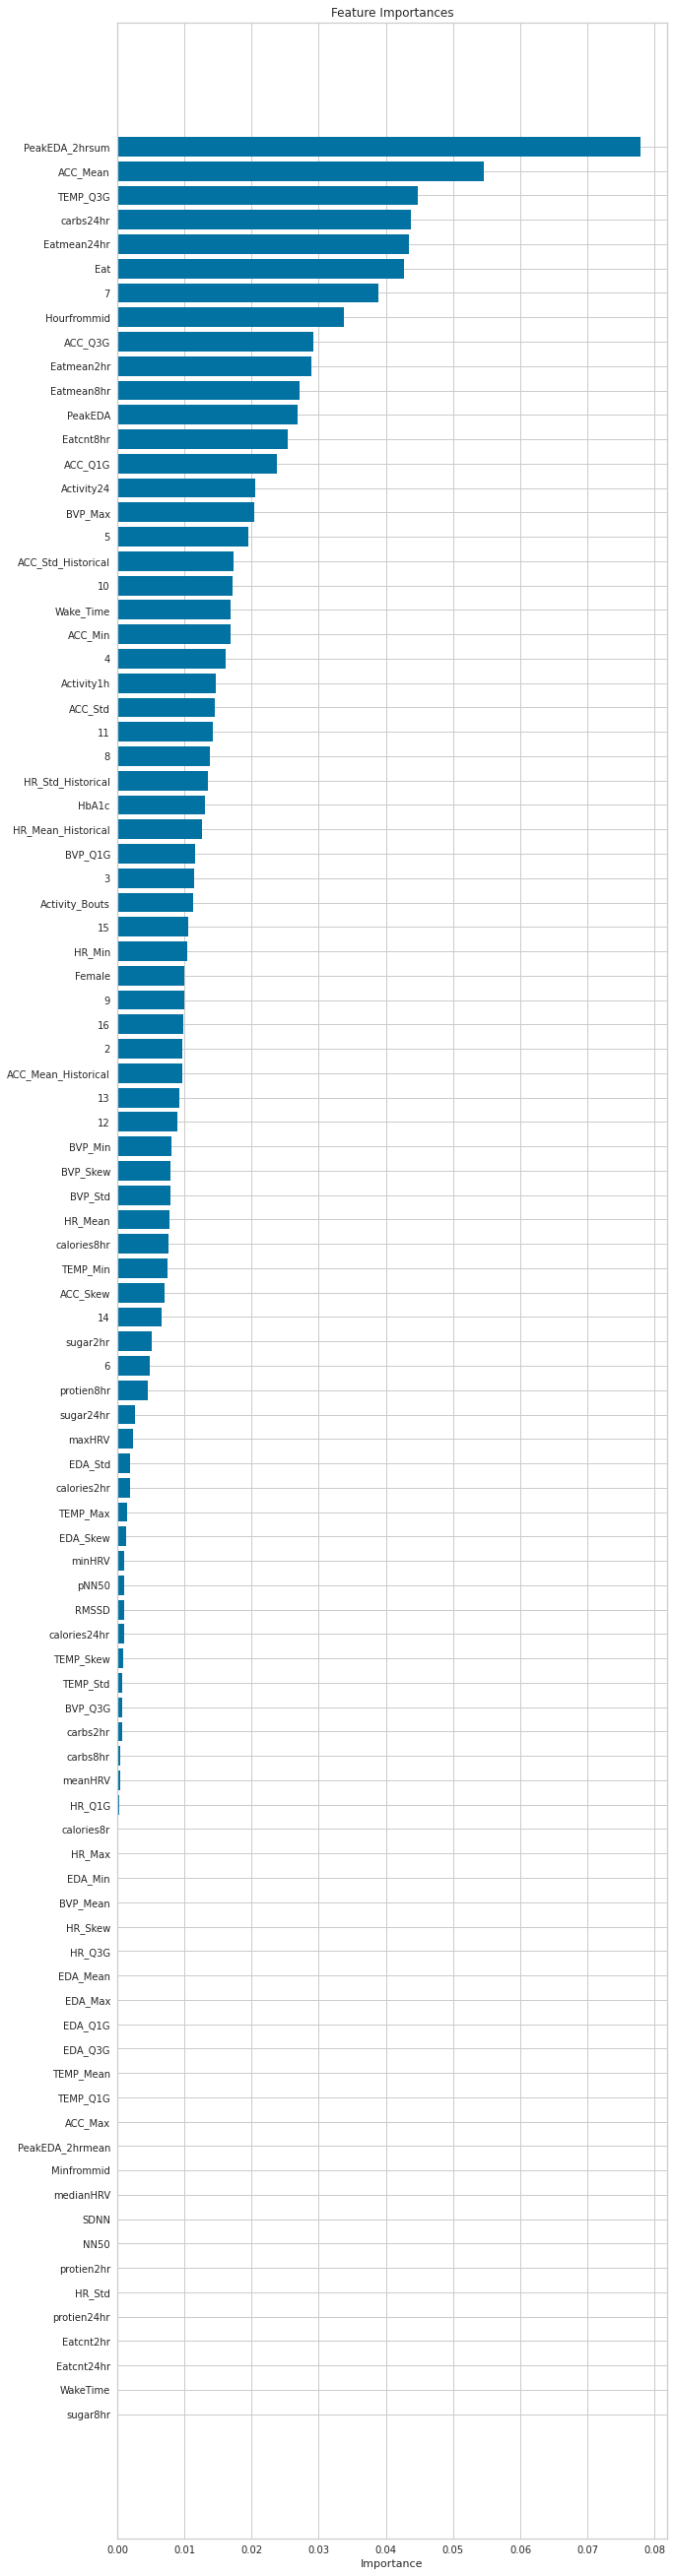

In [99]:
importances = tree.feature_importances_

# Get feature names
feature_names = X_cols

# Sort feature importances in descending order
#indices = np.argsort(importances)[::-1]

# Create a bar plot of feature importances
#plt.figure(figsize=(10, 6))
plt.figure(figsize=(10, 0.5*X_train.shape[1]))  # Adjust the figure height based on the number of features
plt.barh(range(X_train.shape[1]), importances[indices], align='center')
plt.yticks(range(X_train.shape[1]), [feature_names[-i] for i in indices])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important features at the top
plt.show()







In [100]:
X_cols

['HR_Mean',
 'HR_Max',
 'HR_Std',
 'HR_Skew',
 'HR_Q1G',
 'HR_Q3G',
 'EDA_Mean',
 'EDA_Max',
 'EDA_Std',
 'EDA_Skew',
 'EDA_Q1G',
 'EDA_Q3G',
 'TEMP_Mean',
 'TEMP_Max',
 'TEMP_Std',
 'TEMP_Skew',
 'TEMP_Q1G',
 'TEMP_Q3G',
 'ACC_Mean',
 'ACC_Max',
 'ACC_Std',
 'ACC_Skew',
 'ACC_Q1G',
 'ACC_Q3G',
 'BVP_Mean',
 'BVP_Max',
 'BVP_Std',
 'BVP_Skew',
 'BVP_Q1G',
 'BVP_Q3G',
 'HbA1c',
 'PeakEDA',
 'PeakEDA_2hrsum',
 'PeakEDA_2hrmean',
 'maxHRV',
 'minHRV',
 'medianHRV',
 'meanHRV',
 'SDNN',
 'NN50',
 'pNN50',
 'RMSSD',
 'calories2hr',
 'protien2hr',
 'sugar2hr',
 'carbs2hr',
 'calories8r',
 'protien8hr',
 'sugar8hr',
 'carbs8hr',
 'calories24hr',
 'protien24hr',
 'sugar24hr',
 'carbs24hr',
 'Eat',
 'Eatcnt2hr',
 'Eatcnt8hr',
 'Eatcnt24hr',
 'Eatmean2hr',
 'Eatmean8hr',
 'Eatmean24hr',
 'WakeTime',
 'Minfrommid',
 'Hourfrommid',
 'EDA_Min',
 'calories8hr',
 'TEMP_Min',
 'BVP_Min',
 'ACC_Min',
 'HR_Min',
 'Wake_Time',
 'HR_Mean_Historical',
 'HR_Std_Historical',
 'ACC_Mean_Historical',
 'ACC_Std

In [103]:
tree.feature_importances_*100

array([0.77356654, 1.00324882, 0.97927413, 1.06157725, 0.6623205 ,
       0.92593121, 0.89014   , 1.42802563, 1.72332102, 1.00106901,
       1.38068866, 3.88196746, 0.48453538, 1.94643791, 1.61225426,
       1.15046064, 0.97512918, 1.46224659, 2.05410332, 1.12975715,
       1.73719137, 0.9720256 , 1.34941767, 1.26567654, 1.69272231,
       1.04263138, 1.68017852, 0.81180206, 0.74846408, 0.76649285,
       0.        , 3.37571982, 0.        , 0.        , 4.3446203 ,
       2.71811604, 2.89171673, 0.        , 2.53769848, 0.        ,
       4.26160155, 4.37273953, 0.27172948, 0.        , 0.09855602,
       0.04395009, 0.        , 0.45693676, 0.01376631, 0.06829119,
       0.5181362 , 0.        , 0.18420259, 0.09878654, 0.10000453,
       0.        , 0.        , 0.03988748, 0.        , 0.10445281,
       0.233292  , 0.        , 7.79418334, 2.68812192, 1.30888486,
       0.07445663, 1.15532739, 0.79551006, 0.79279205, 2.03365014,
       0.        , 2.91556125, 2.37792322, 0.69951184, 1.45534

In [391]:
visualizer = ClassificationReport(clf, classes=['Normal','High','Low'], support=True)
X_train, X_test, y_train, y_test = train_test_split( df_downsampled[X_cols], df_downsampled[Y_col],test_size=0.3)

/opt/nesi/CS400_centos7_bdw/Python/3.10.5-gimkl-2022a/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/nesi/CS400_centos7_bdw/Python/3.10.5-gimkl-2022a/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/nesi/CS400_centos7_bdw/Python/3.10.5-gimkl-2022a/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/nesi/CS400_centos7_bdw/Python/3.10.5-gimkl-2022a/lib/python3.10/site-packa

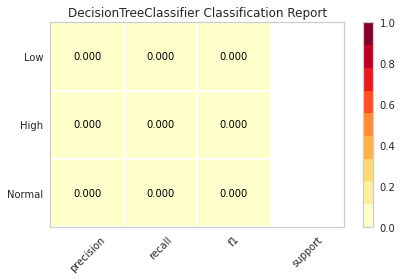

<AxesSubplot:title={'center':'DecisionTreeClassifier Classification Report'}>

In [392]:
visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

In [34]:
import time

import numpy as np

start_time = time.time()
importances = tree.feature_importances_
#std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.001 seconds


In [60]:
clf.coef0

0.0

In [58]:
import time

import numpy as np

start_time = time.time()
importances = clf.feature_importances_
#std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

AttributeError: 'SVC' object has no attribute 'feature_importances_'

In [ ]:
import pandas as pd

forest_importances = pd.Series(importances, index=X_cols)
plt.figure(figsize=(75, 5*X_train.shape[1]))
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
#plt.gca().invert_yaxis()
#fig.tight_layout()
plt.show()

<Figure size 5400x33840 with 0 Axes>

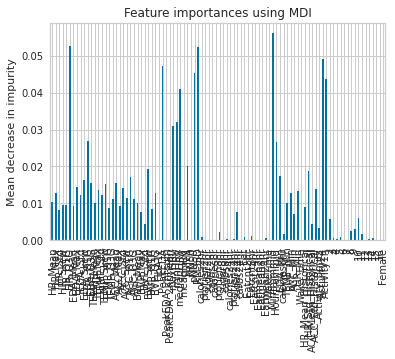

In [35]:
import pandas as pd

forest_importances = pd.Series(importances, index=X_cols)
plt.figure(figsize=(75, 5*X_train.shape[1]))
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
#plt.gca().invert_yaxis()
#fig.tight_layout()
plt.show()

In [119]:
pip install tabulate --user

Note: you may need to restart the kernel to use updated packages.


In [121]:
from tabulate import tabulate

In [125]:
print(forest_importances*100)

HR_Mean    0.773567
HR_Max     1.003249
HR_Std     0.979274
HR_Skew    1.061577
HR_Q1G     0.662320
             ...   
13         0.000000
14         0.031024
15         0.000000
16         0.000000
Female     0.000000
Length: 94, dtype: float64


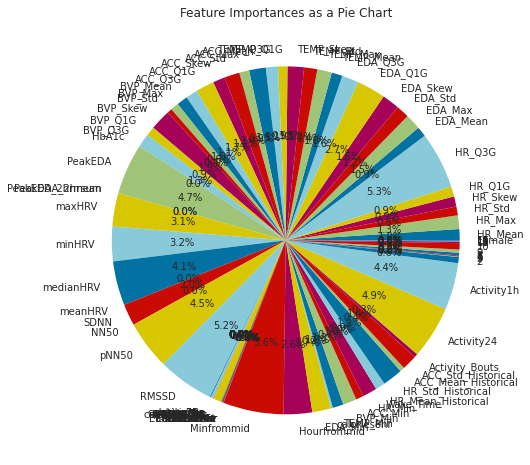

In [36]:
# Create a pie chart
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
plt.pie(forest_importances, labels=forest_importances.index, autopct='%1.1f%%')
plt.title("Feature Importances as a Pie Chart")
plt.show()

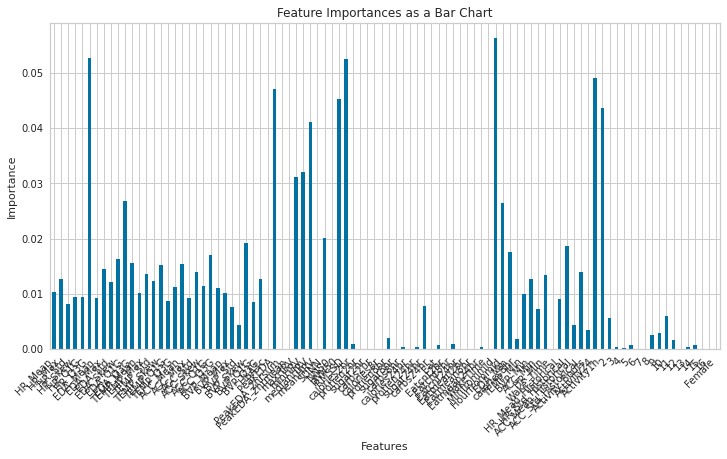

In [37]:
# Create a bar chart
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
forest_importances.plot(kind='bar')
plt.title("Feature Importances as a Bar Chart")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

In [42]:
sorted_importances = forest_importances.sort_values(ascending=False)
sorted_importances*100

Minfrommid    5.621613
HR_Q3G        5.267405
RMSSD         5.241912
Activity24    4.901342
PeakEDA       4.714053
                ...   
carbs24hr     0.000000
Eatcnt2hr     0.000000
WakeTime      0.000000
Eatmean8hr    0.000000
Female        0.000000
Length: 94, dtype: float64

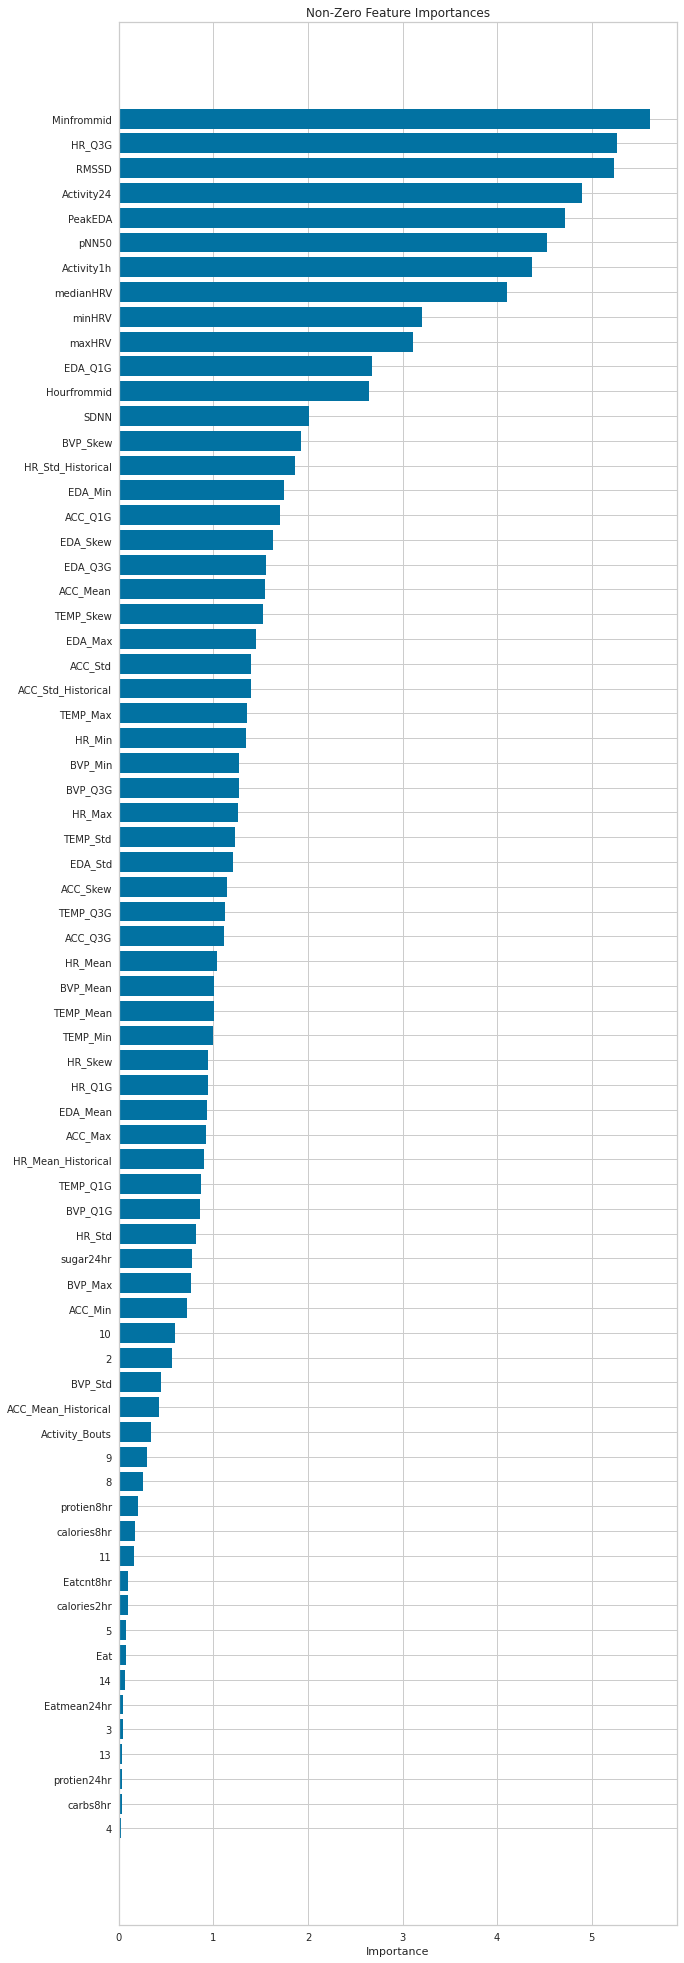

In [44]:
sorted_importances_nonzero = sorted_importances[sorted_importances != 0]*100

# Create a figure with a size based on the number of non-zero values
plt.figure(figsize=(10, 0.5 * len(sorted_importances_nonzero)))

# Create a bar plot for non-zero values
plt.barh(range(len(sorted_importances_nonzero)), sorted_importances_nonzero, align='center')
plt.yticks(range(len(sorted_importances_nonzero)), sorted_importances_nonzero.index)
plt.xlabel('Importance')
plt.title('Non-Zero Feature Importances')

# Invert the y-axis to display the most important features at the top
plt.gca().invert_yaxis()
plt.show()

In [48]:
print(sorted_importances_nonzero)

Minfrommid     5.621613
HR_Q3G         5.267405
RMSSD          5.241912
Activity24     4.901342
PeakEDA        4.714053
                 ...   
3              0.043965
13             0.031022
protien24hr    0.031022
carbs8hr       0.031022
4              0.018843
Length: 70, dtype: float64


In [49]:
sorted_importances_nonzero.to_excel('features_importances_non_zero.xlsx')

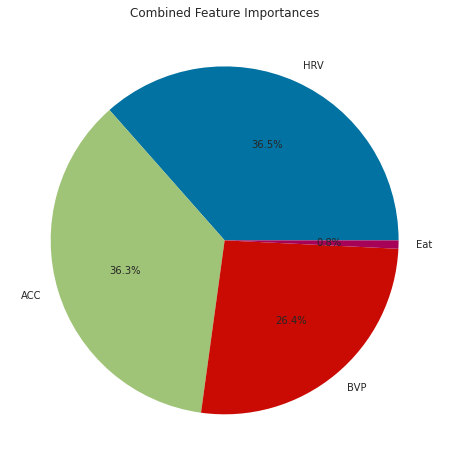

In [46]:
grouped_importances = {
    'HRV': forest_importances.filter(like='HRV').sum(),
    'ACC': forest_importances.filter(like='ACC').sum(),
    'BVP': forest_importances.filter(like='BVP').sum(),
    'Eat': forest_importances.filter(like='Eat').sum(),
    #'Other': forest_importances.drop(['HRV', 'ACC', 'BVP', 'Eat']).sum()
}

# Create a pie chart
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
plt.pie(grouped_importances.values(), labels=grouped_importances.keys(), autopct='%1.1f%%')
plt.title("Combined Feature Importances")
plt.show()

In [41]:
sorted_importances, sorted_feature_names = zip(*sorted(zip(importances, X_cols), reverse=True))

# Create a figure with a size based on the number of features
plt.figure(figsize=(10, 0.5 * len(feature_names)))

# Create a horizontal bar chart
plt.barh(range(len(sorted_feature_names)), sorted_importances, align='center')
plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
plt.xlabel('Importance')
plt.title('Feature Importances')

# Invert the y-axis to display the most important features at the top
plt.gca().invert_yaxis()
plt.show()

TypeError: '<' not supported between instances of 'int' and 'str'

In [1]:
# Create a bar chart
plt.figure(figsize=(12, 6))  # Adjust the figuresorted_importancesneeded
forest_importances.plot(kind='bar')
plt.title("Feature Importances as a Bar Chart")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

NameError: name 'plt' is not defined

In [122]:
print(tabulate(forest_importances, headers='keys', tablefmt='psql'))

TypeError: 'numpy.float64' object is not iterable

In [400]:
X_train, X_test, y_train, y_test = train_test_split(df_downsampled[X_cols], df_downsampled[Y_col],test_size=0.3)

In [397]:
df_downsampled[Y_col]

25088    108.0
22316    108.0
31587    114.0
5431     103.0
31027    131.0
         ...  
20598     71.0
14219    100.0
14776     69.0
16381     99.0
11894     74.0
Name: IG, Length: 9210, dtype: float64

In [401]:
regr.fit(X_train, y_train)

/opt/nesi/CS400_centos7_bdw/Python/3.10.5-gimkl-2022a/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


SVR()

In [403]:
y_pred=regr.predict(X_test)

/opt/nesi/CS400_centos7_bdw/Python/3.10.5-gimkl-2022a/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [402]:
from sklearn.metrics import mean_squared_error

In [404]:
errors = mean_squared_error(y_test, y_pred)

In [405]:
errors

868.7302482042451

In [406]:
y_pred

array([114.57515482, 116.37750144, 118.03391949, ..., 117.95059045,
        88.72466803,  90.29723446])

In [407]:
y_test

12045    113.0
14627    103.0
22438    195.0
31536    166.0
12134    103.0
         ...  
10635     77.0
13321     95.0
22432    143.0
33735     86.0
1455      83.0
Name: IG, Length: 2763, dtype: float64

In [408]:
from sklearn.metrics import mean_absolute_error

In [409]:
errors = mean_absolute_error(y_test, y_pred)

In [410]:
errors

21.061339781669922

In [412]:
from sklearn.metrics import mean_squared_error

In [ ]:
from yellowbrick.regressor import CooksDistance
from yellowbrick.datasets import load_concrete

# Load the regression dataset


# Instantiate and fit the visualizer
visualizer = CooksDistance()
visualizer.fit(X_test, y)
visualizer.show()